# **1.** **Importing** & **Ploting** liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **1.1.** Setting style to **ggplot**

In [3]:
plt.style.use('ggplot')
%matplotlib inline

## **1.2.** Setting plot **Size**, **Font** & **Mode**

In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font' , **font)
plt.rcParams['savefig.dpi'] = 480
plt.rcParams["figure.figsize"] = (40, 30)

# **2.** Importing Data to **DataFram**

In [11]:
train_df = pd.read_csv("./resources/originalData/train.csv",float_precision='high')
train_df.drop(columns="ID",inplace=True)

In [40]:
print("SIRA 25:",train_df[train_df['y']=='SIRA']['Area'].quantile(0.25))
print("SIRA mean:",train_df[train_df['y']=='SIRA']['Area'].mean())
print("SIRA 75:",train_df[train_df['y']=='SIRA']['Area'].quantile(1))
print("DERMASON 25:",train_df[train_df['y']=='DERMASON']['Area'].quantile(0.25))
print("DERMASON mean:",train_df[train_df['y']=='DERMASON']['Area'].mean())
print("DERMASON 75:",train_df[train_df['y']=='DERMASON']['Area'].quantile(1))

SIRA 25: 41565.0
SIRA mean: 44712.792792792796
SIRA 75: 63612.0
DERMASON 25: 28654.0
DERMASON mean: 32197.808600634475
DERMASON 75: 42159.0


<AxesSubplot:xlabel='Area', ylabel='Proportion'>

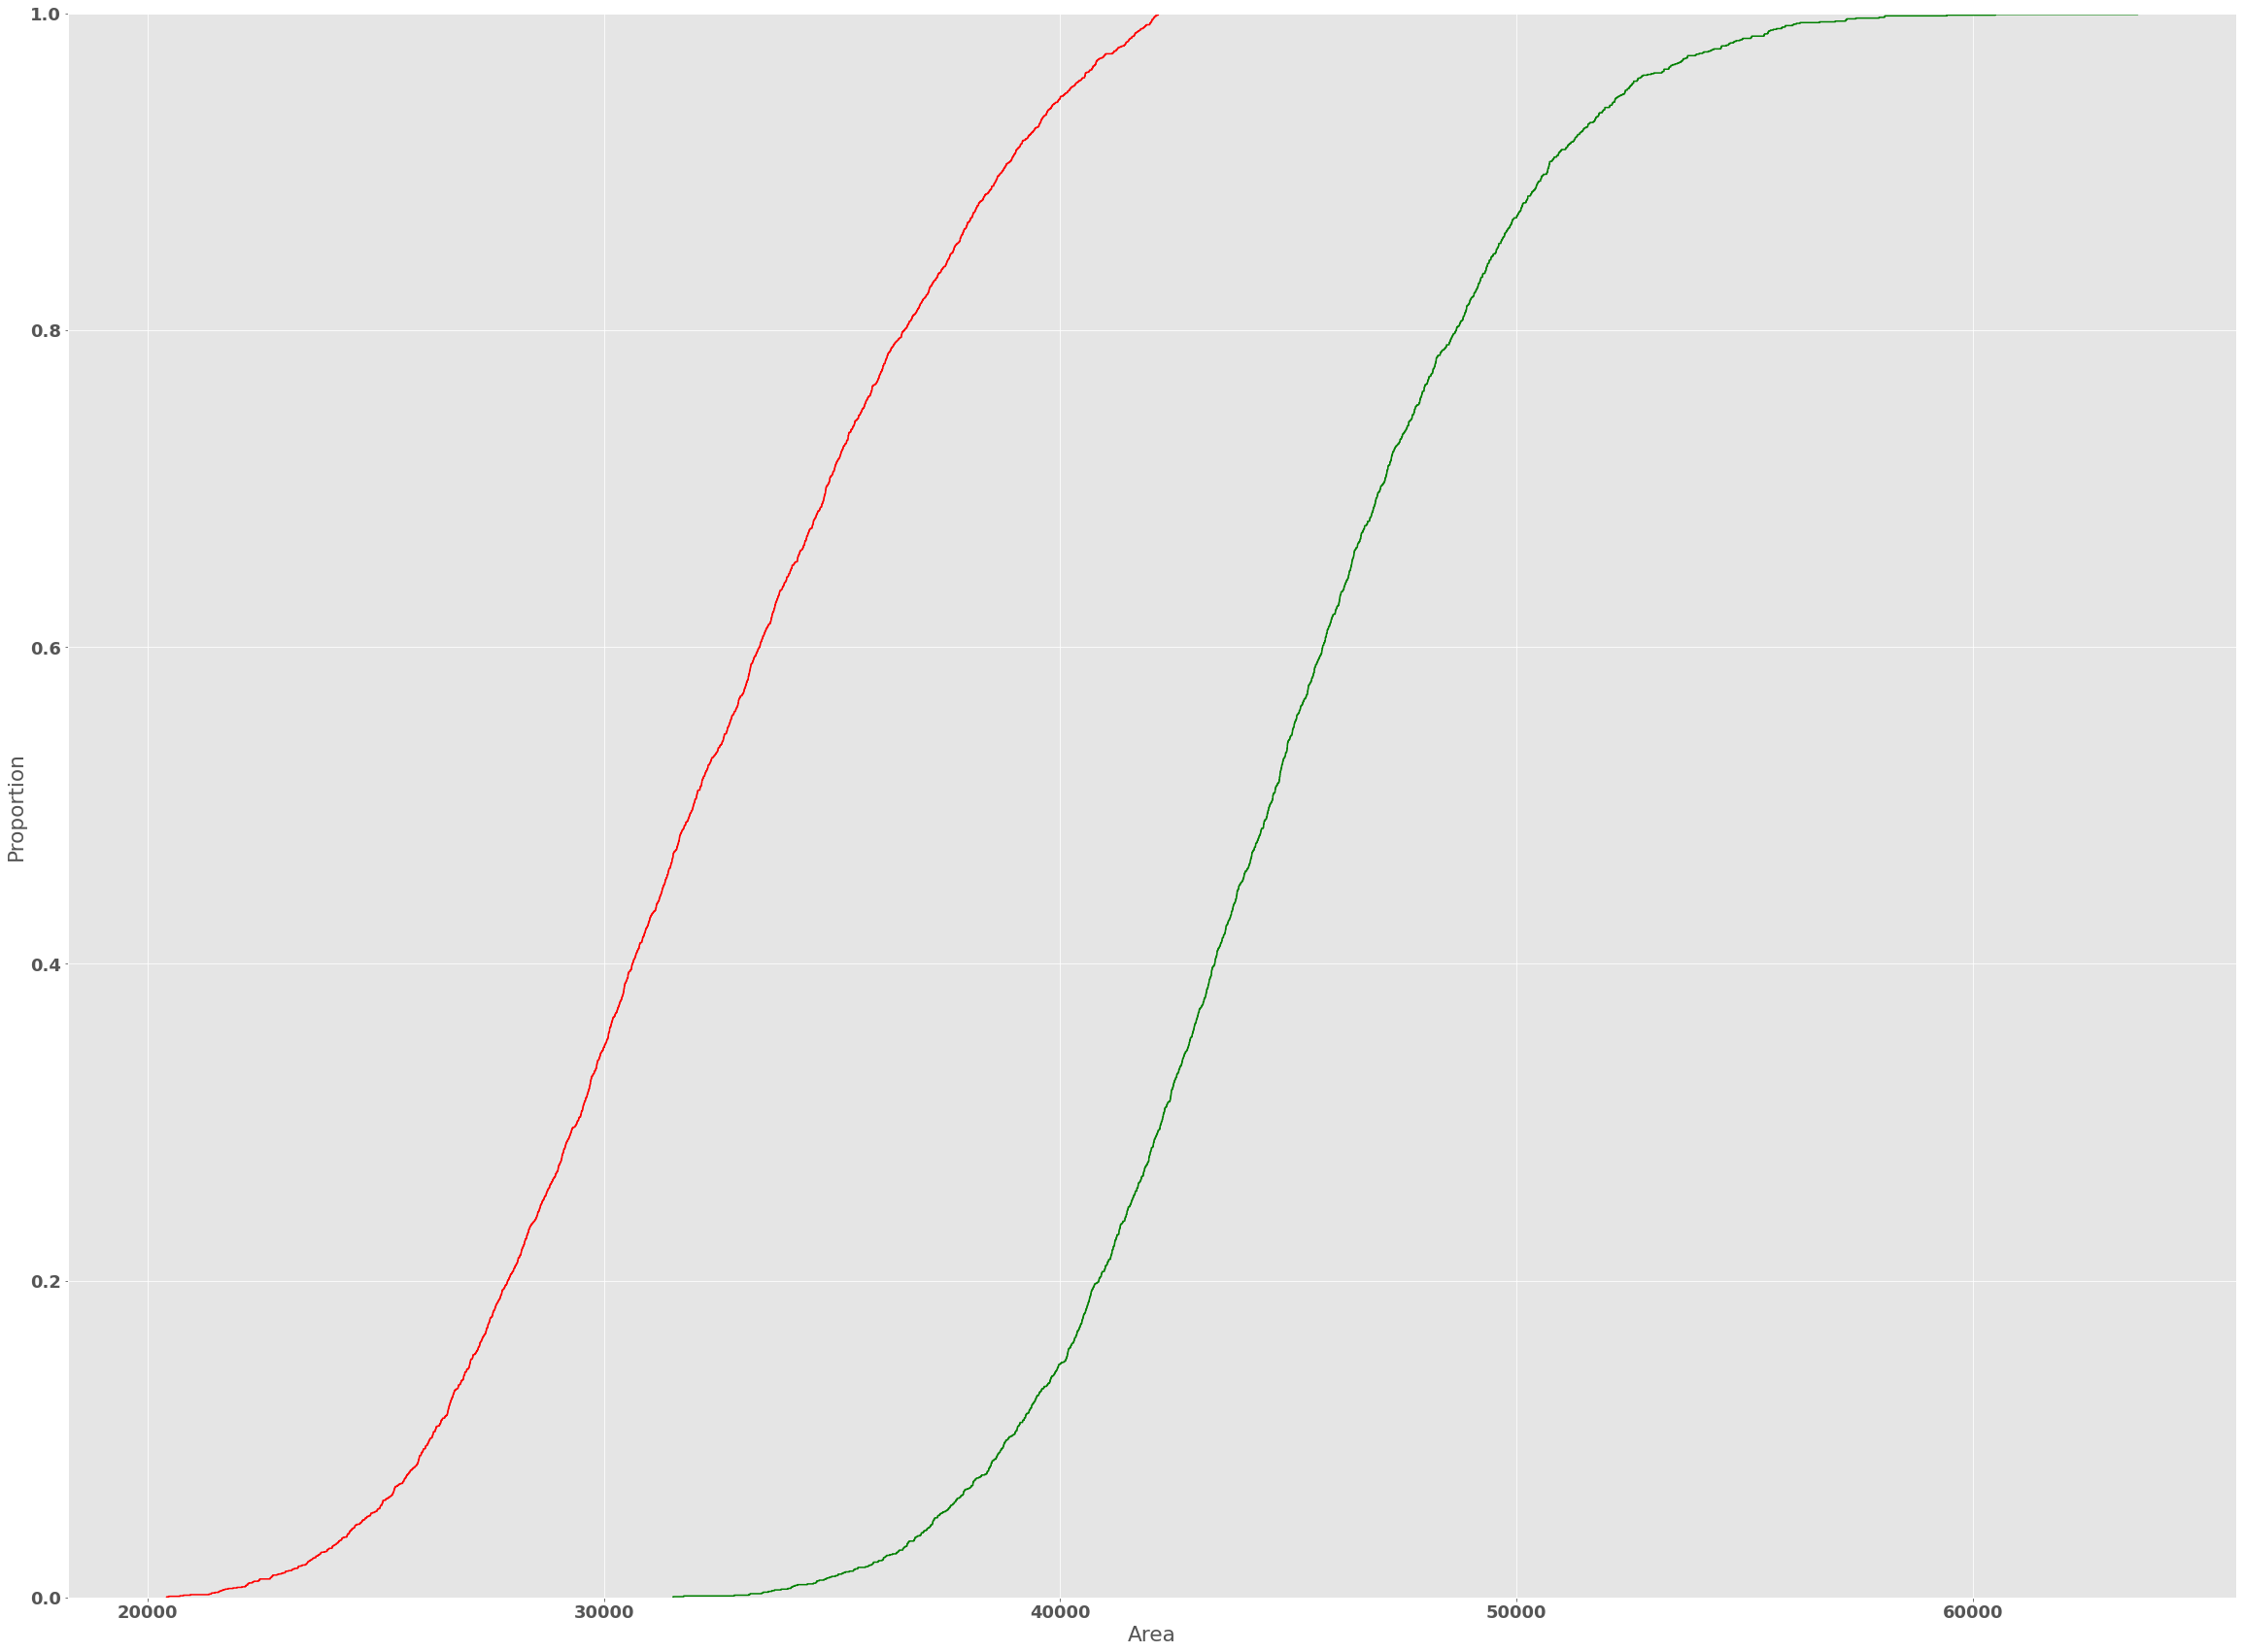

In [43]:
sns.ecdfplot(train_df[train_df['y']=='DERMASON']['Area'],color='red')
sns.ecdfplot(train_df[train_df['y']=='SIRA']['Area'],color='green')

# **3.** Explotary Data Analysis **"EDA"**

<img src="./resources/generatedData/Variables_formulas.png">

## **3.1.** **Null** values study

In [ ]:
pd.DataFrame(train_df.isna().sum(),columns=['Null Count'])

,Null Count
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


## **3.2.** Numirical **statistics**

In [ ]:
train_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00,10237.00
mean,53897.44,861.69,322.53,203.63,1.58,0.75,54631.33,254.84,0.75,0.99,0.87,0.80,0.01,0.00,0.64,1.00
std,30195.05,219.41,87.75,46.09,0.25,0.09,30661.90,60.69,0.05,0.00,0.06,0.06,0.00,0.00,0.10,0.00
min,20420.00,524.93,183.60,129.58,1.02,0.22,20684.00,161.24,0.56,0.92,0.49,0.65,0.00,0.00,0.42,0.95
25%,36032.00,699.81,251.65,175.68,1.43,0.71,36443.00,214.19,0.72,0.99,0.83,0.76,0.01,0.00,0.58,0.99
50%,45664.00,806.88,302.54,193.97,1.55,0.77,46212.00,241.12,0.76,0.99,0.88,0.80,0.01,0.00,0.64,1.00
75%,62879.00,988.06,379.58,220.41,1.71,0.81,63931.00,282.95,0.79,0.99,0.92,0.84,0.01,0.00,0.70,1.00
max,254616.00,1985.37,738.86,450.93,2.39,0.91,263261.00,569.37,0.87,0.99,0.99,0.99,0.01,0.00,0.97,1.00


## **3.3.** **Discover** Imbalance in data

<AxesSubplot:xlabel='y'>

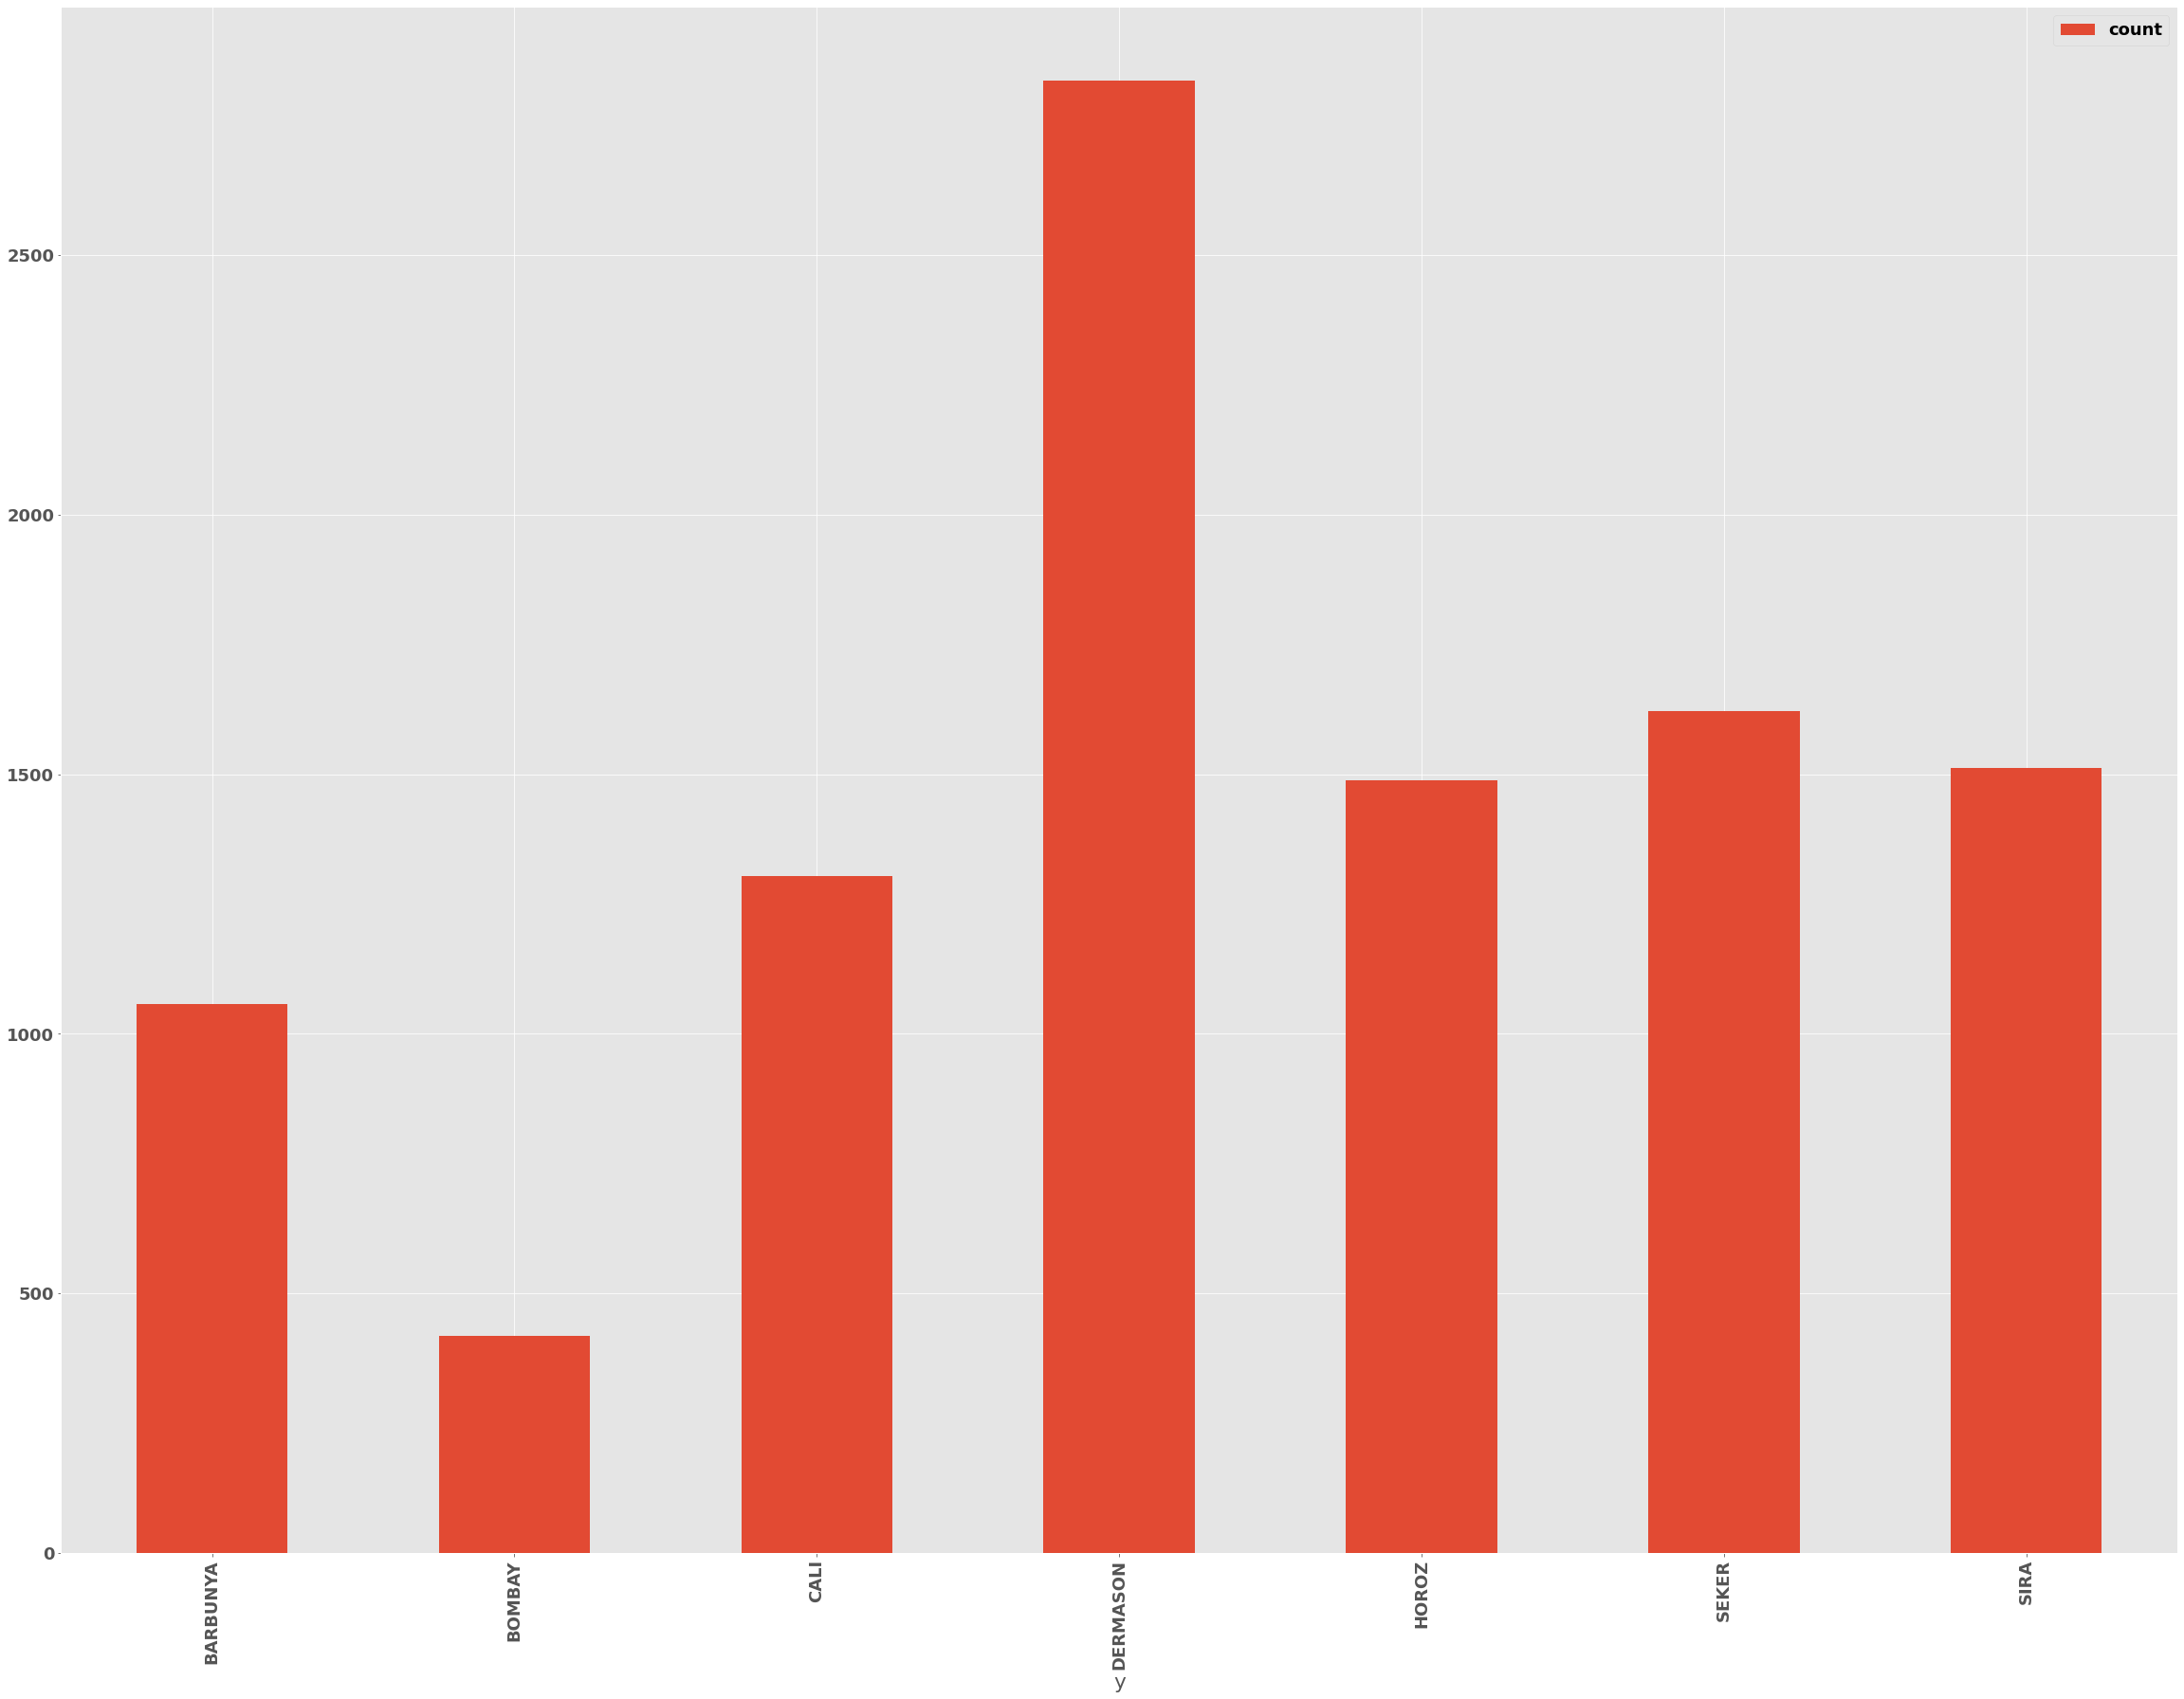

In [ ]:
train_df.groupby('y').agg(count=pd.NamedAgg(column='Area',aggfunc='count')).plot.bar()

## **3.4.** Features **types** study

In [ ]:
numerical_feature = train_df.columns.to_list()[:-1]
continuous_feature =  train_df.columns.to_list()[:-1]
discret_feature = []
catagorical_feature = ["y"]

print("Numerical feature:",len(numerical_feature))
print("Continuous feature:",len(continuous_feature))
print("Discret feature:",len(discret_feature))
print("Catagorical feature:",len(catagorical_feature))

Numerical feature: 16
Continuous feature: 16
Discret feature: 0
Catagorical feature: 1


## **3.5.** Studying **Correlation** between features

<AxesSubplot:>

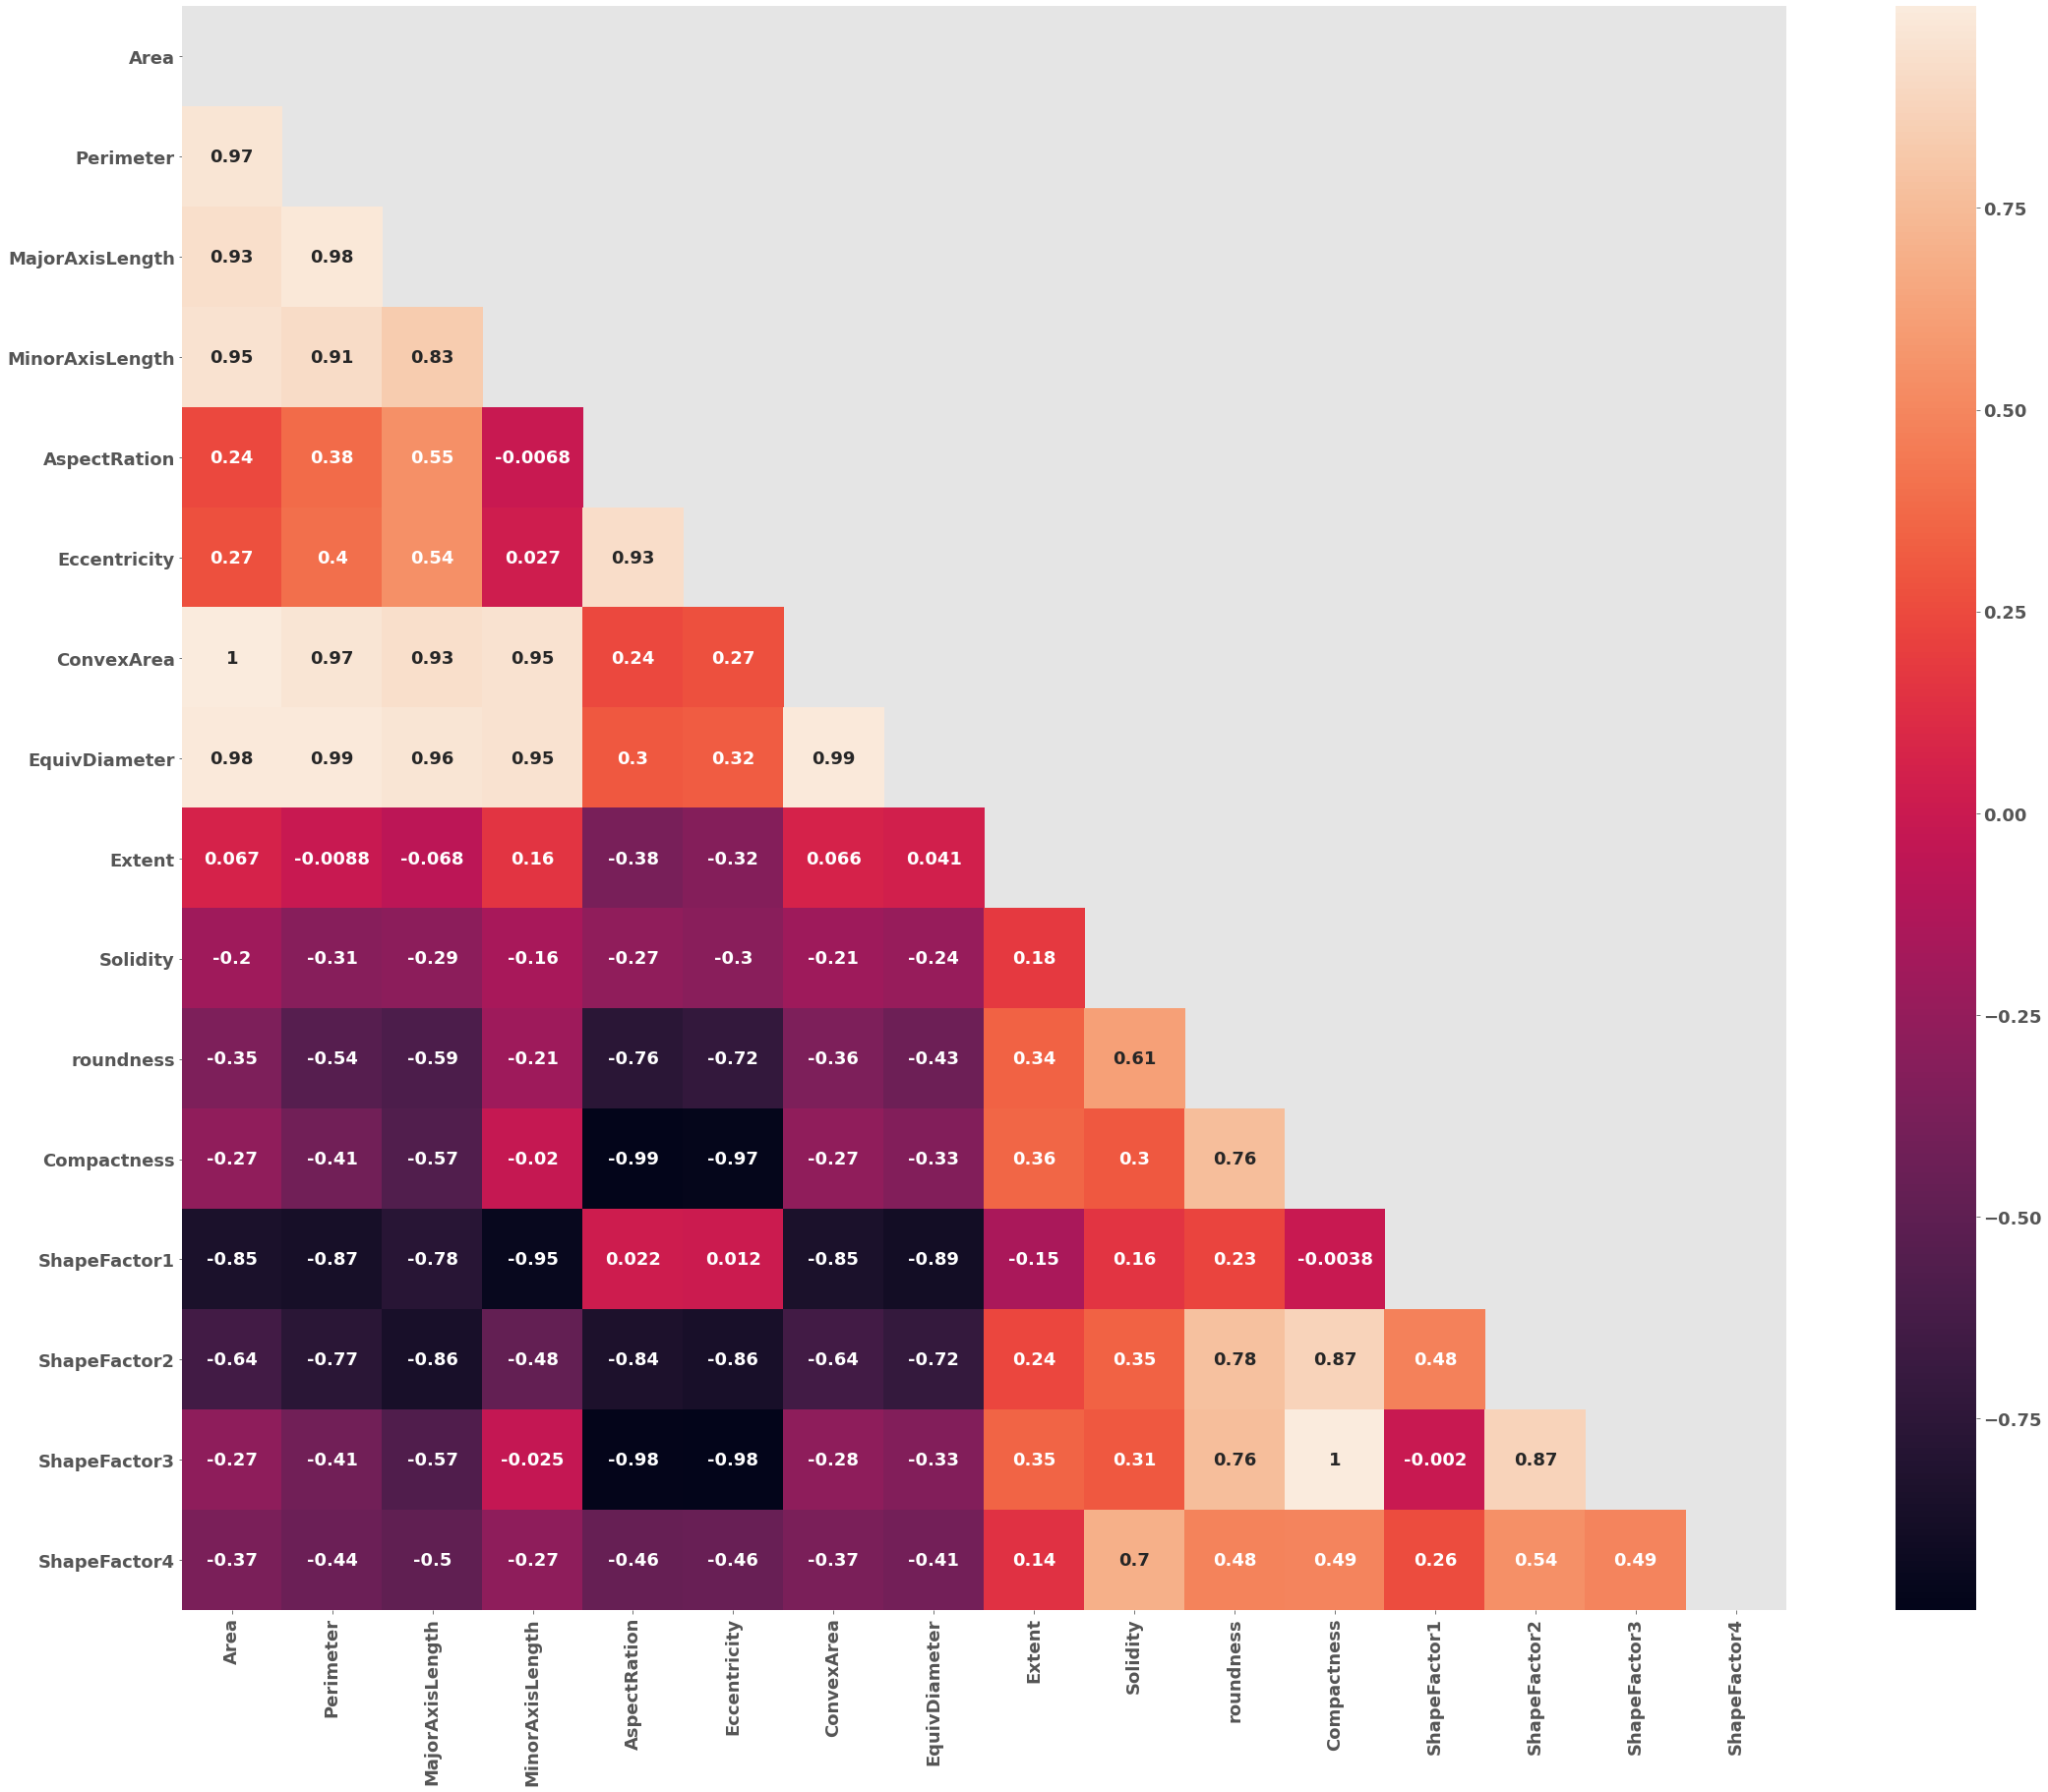

In [ ]:
corr = train_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, annot=True)

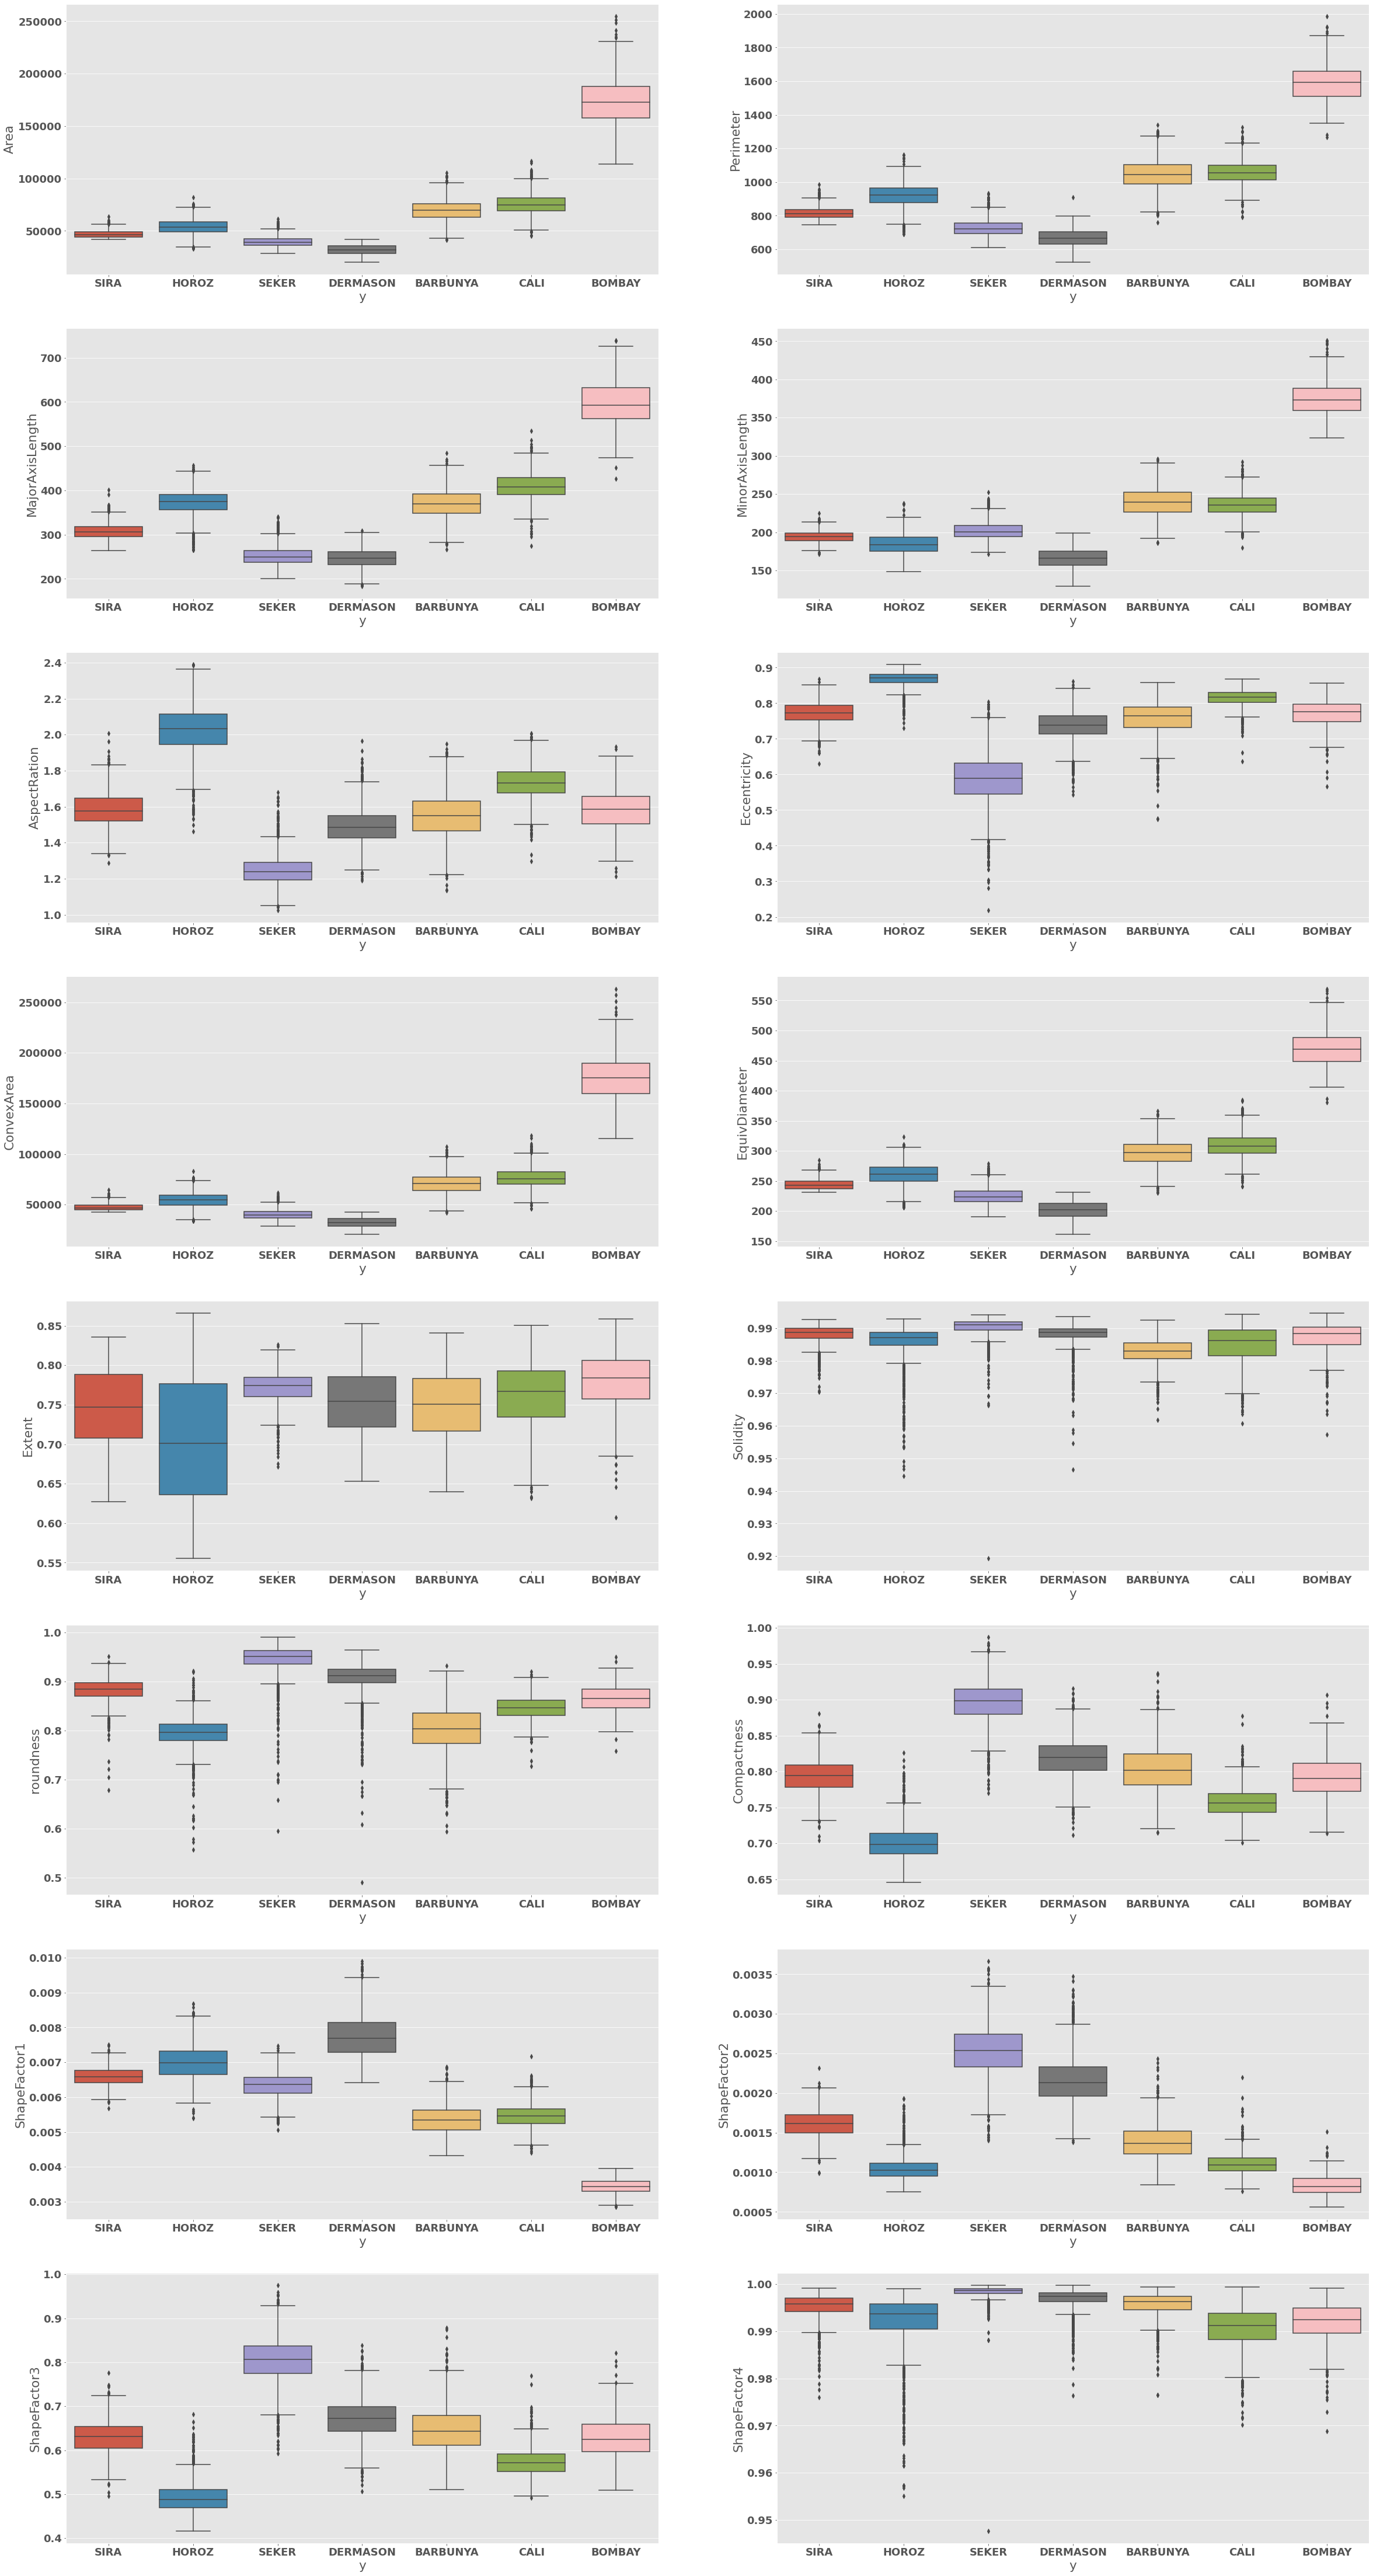

In [ ]:
fig = plt.figure(figsize=[40,80])
for index,feature in enumerate(continuous_feature):
    ax = fig.add_subplot(8,2,index+1)
    sns.boxplot(data=train_df,x="y",y=feature,ax=ax)

## **3.6.** Correlation ***Conclusion:***
### **3.6.1.** Consider removing either ***shape_factor_3*** or ***Compactness*** as the corelation between them is **1** 
### **3.6.2.** Consider removing either ***Area*** or ***Convex_Area*** as the corelation between them is **1** 
### **3.6.3.** Consider removing ***Extent*** as it has **weak** relation with the target variable
### **3.6.4.** Consider removing or transformin ***solidity*** as it has **weak or unclear** relation with the target variable
### **3.6.5.** Consider removing or transformin ***shape_factor_4*** as it has **weak or unclear** relation with the target variable
### **3.6.6.** Consider removing or transformin ***Eccentricity*** as it has **weak or unclear** relation with the target variable
### **3.6.7.** Consider removing outlier from ***solidity*** befor **remove**

## **3.7.** Studying features **Skewness**

In [ ]:
pd.DataFrame(train_df[numerical_feature].skew(),columns=["skewness"])

,skewness
Area,2.87
Perimeter,1.56
MajorAxisLength,1.31
MinorAxisLength,2.16
AspectRation,0.55
Eccentricity,-1.05
ConvexArea,2.86
EquivDiameter,1.88
Extent,-0.91
Solidity,-2.48


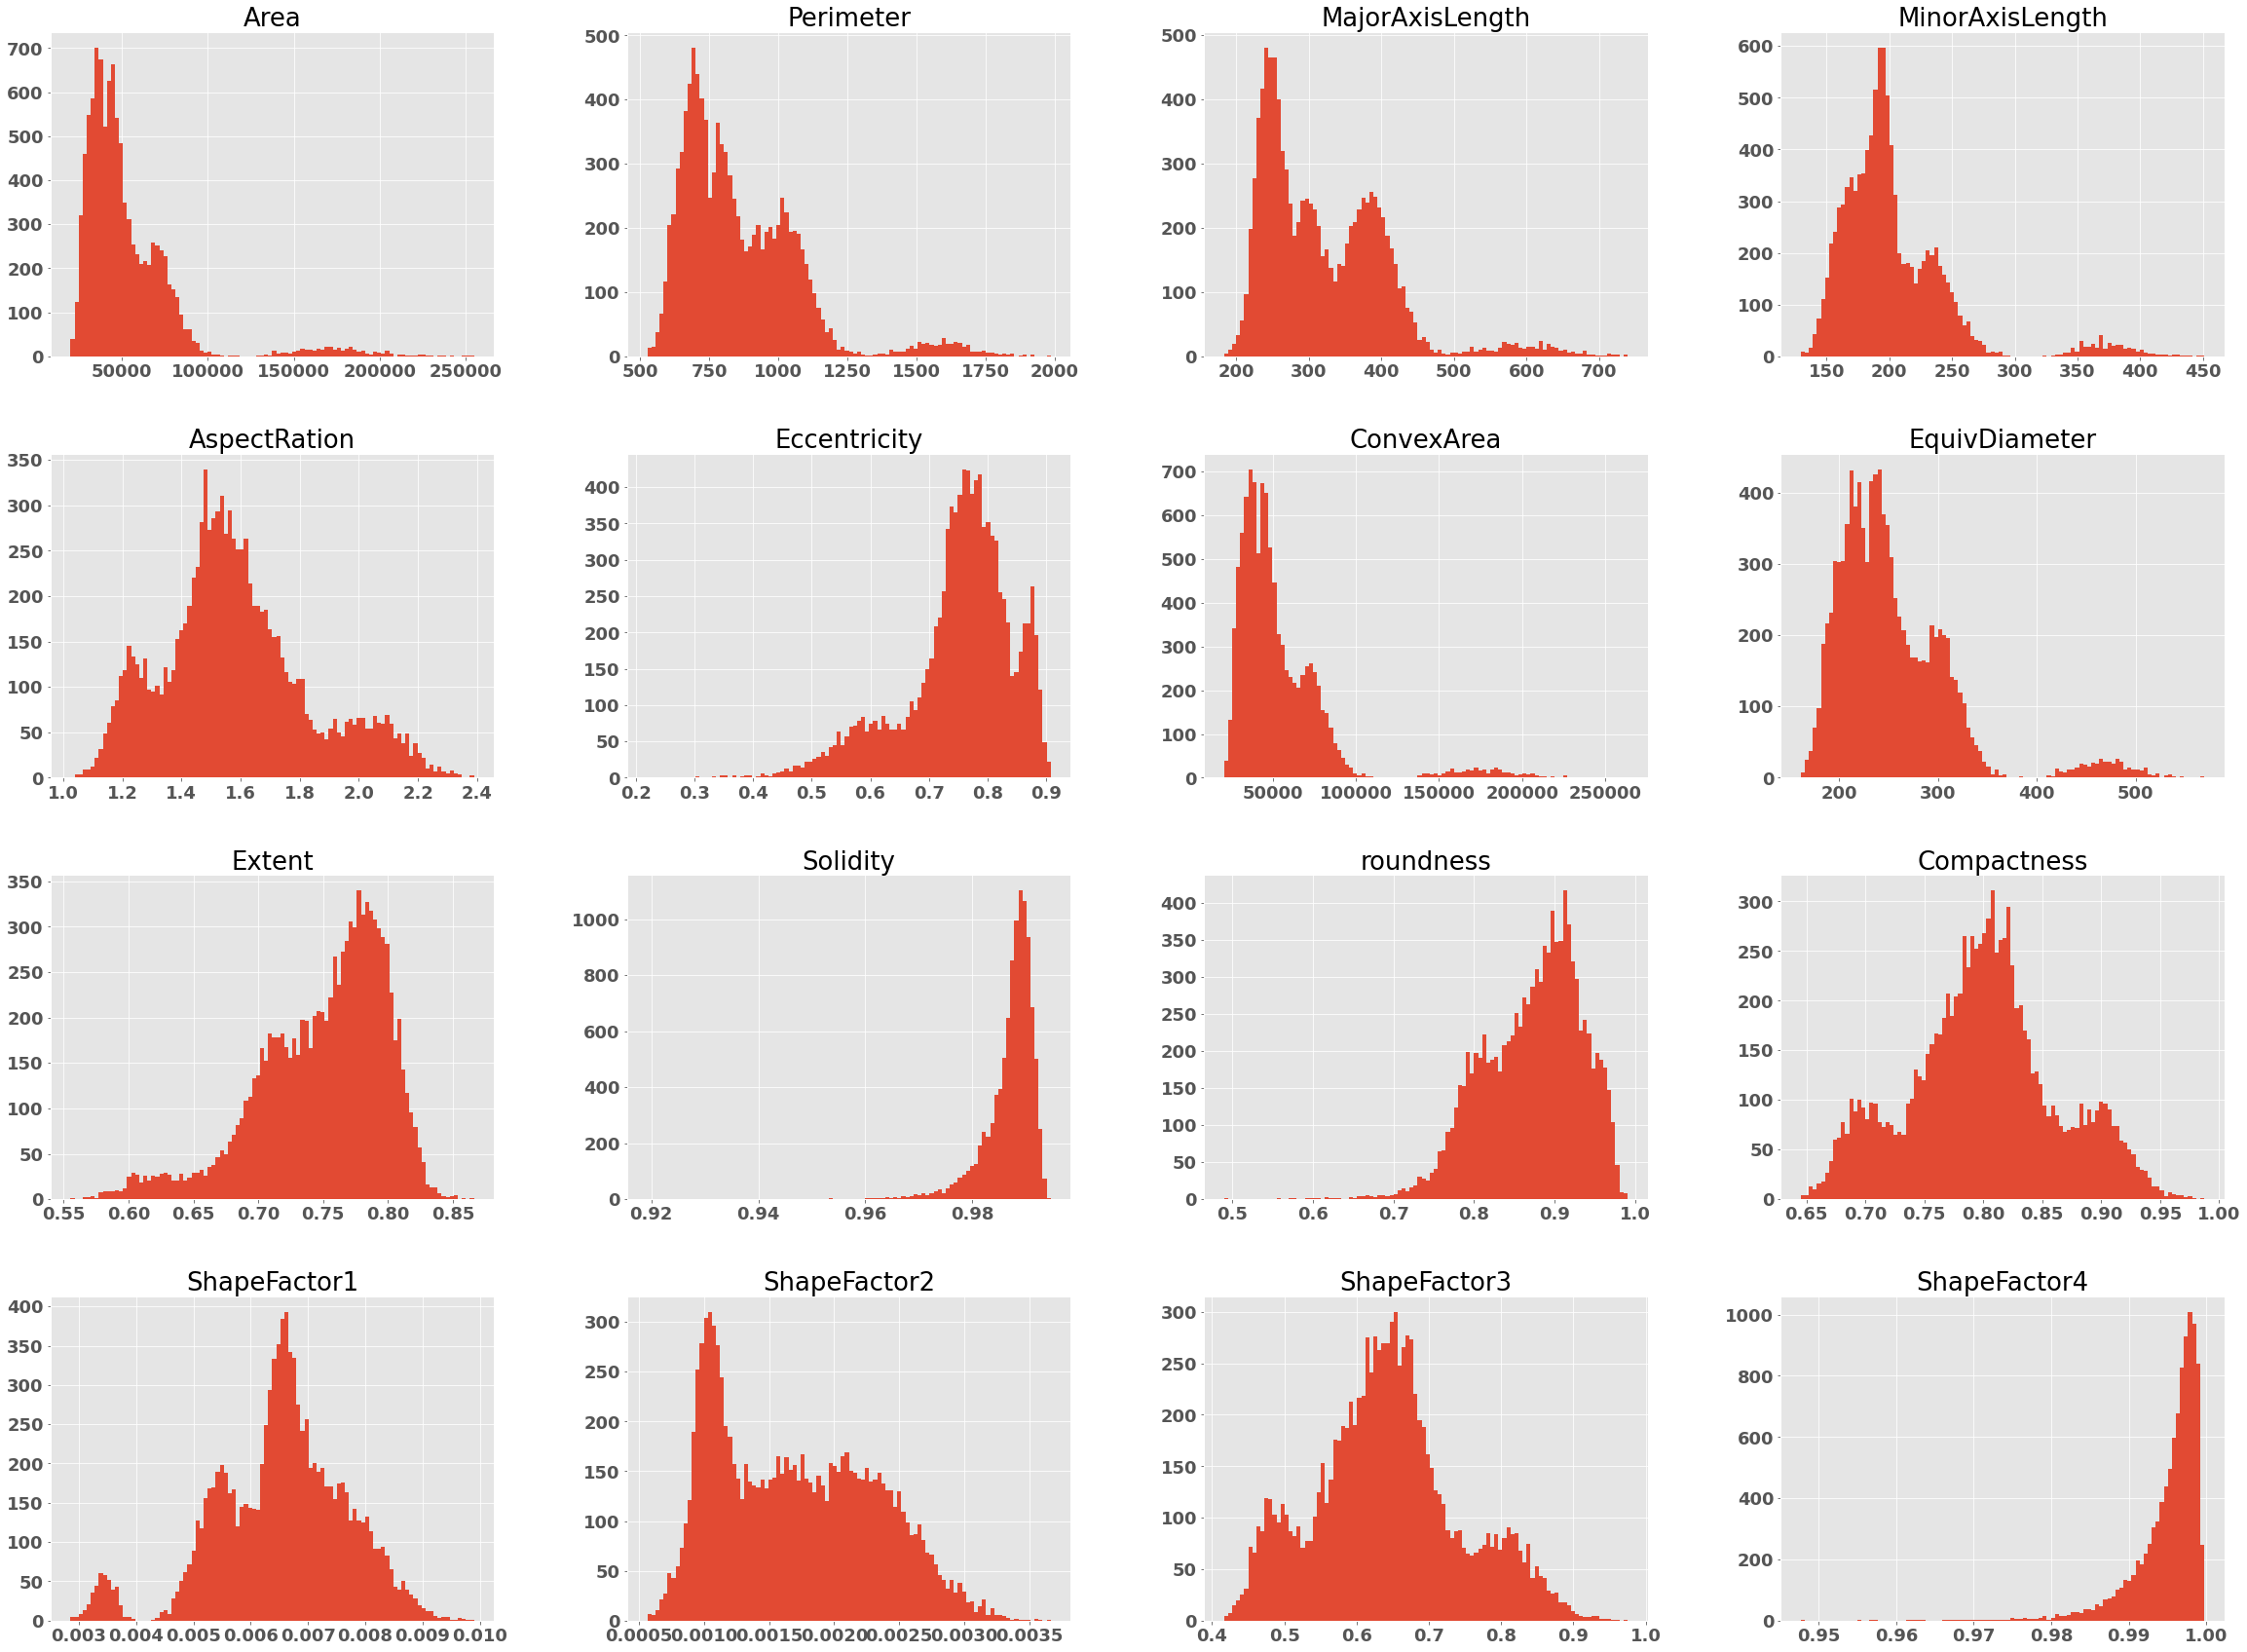

In [ ]:
train_df.hist(bins=100);

In [ ]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

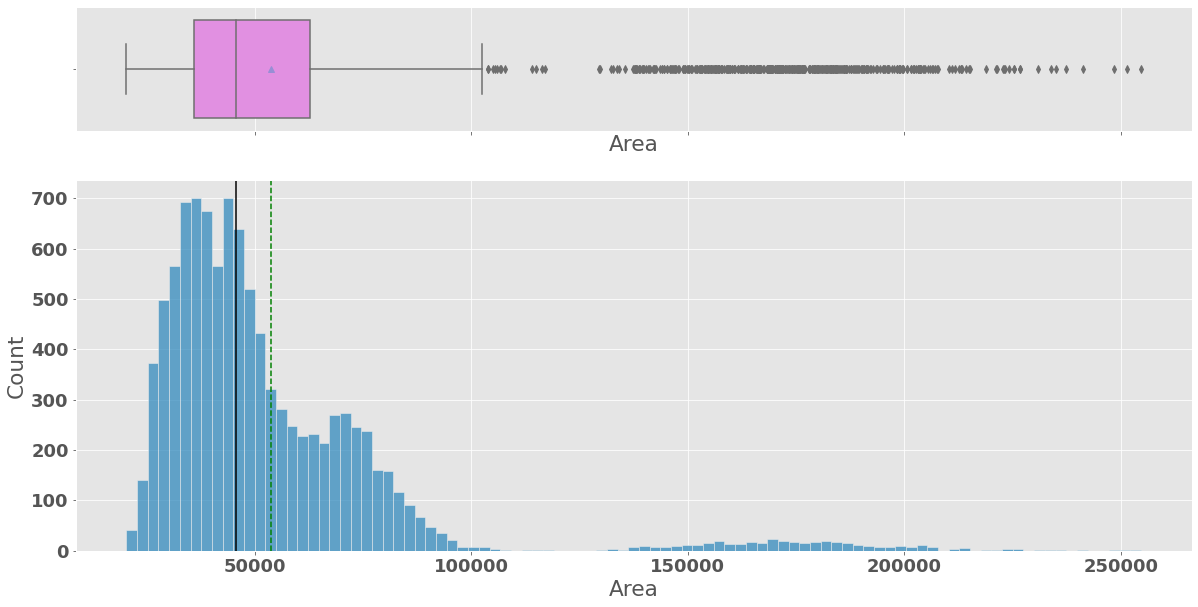

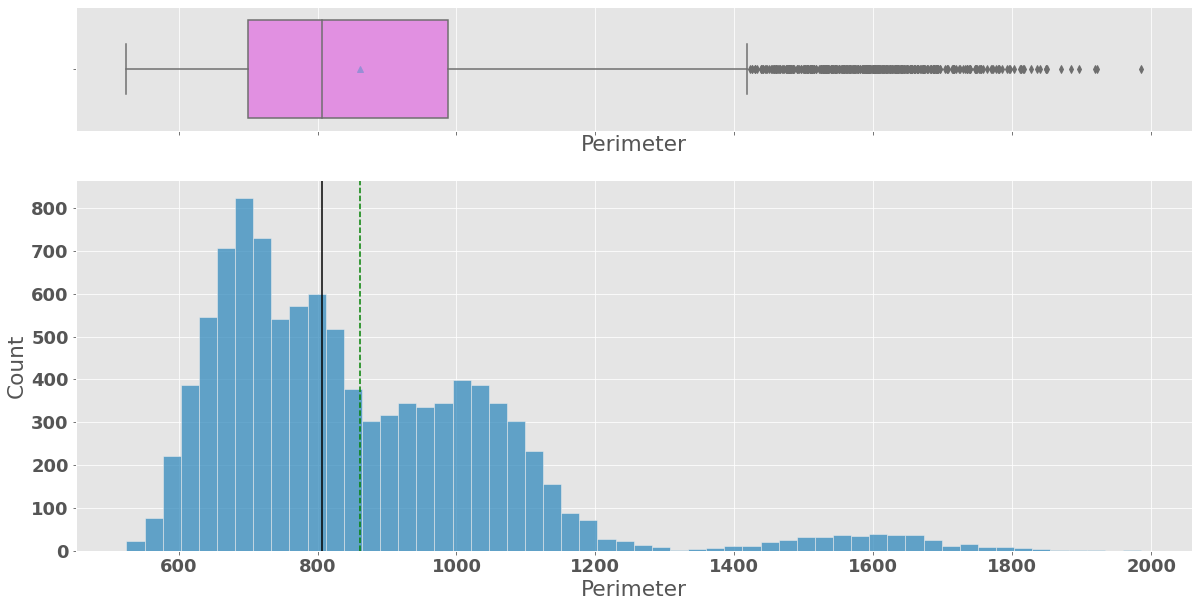

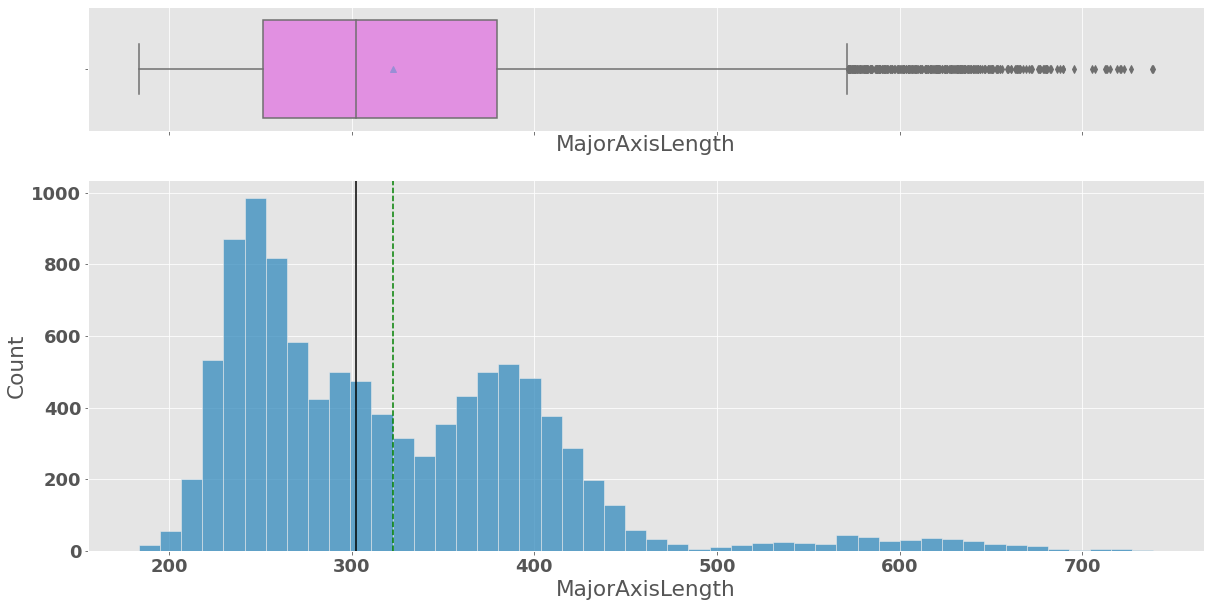

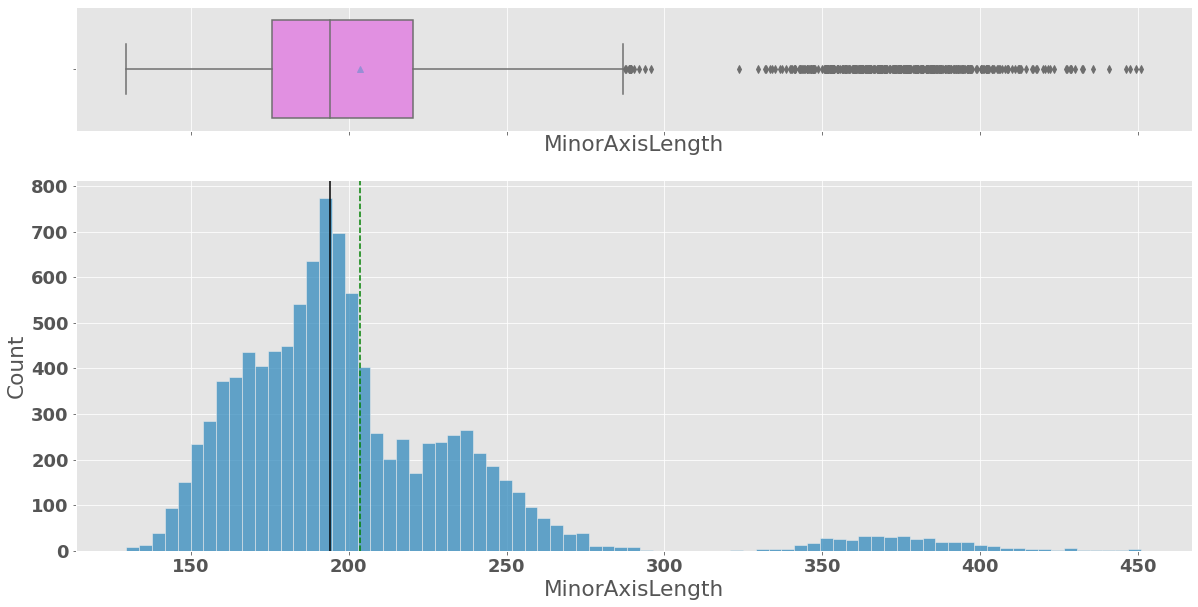

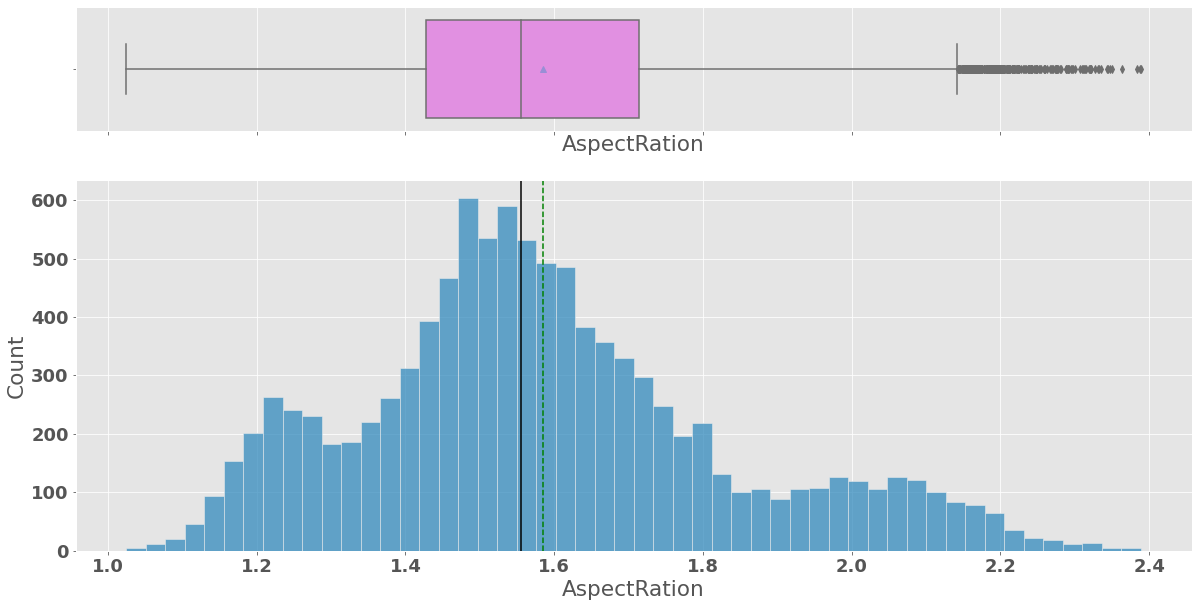

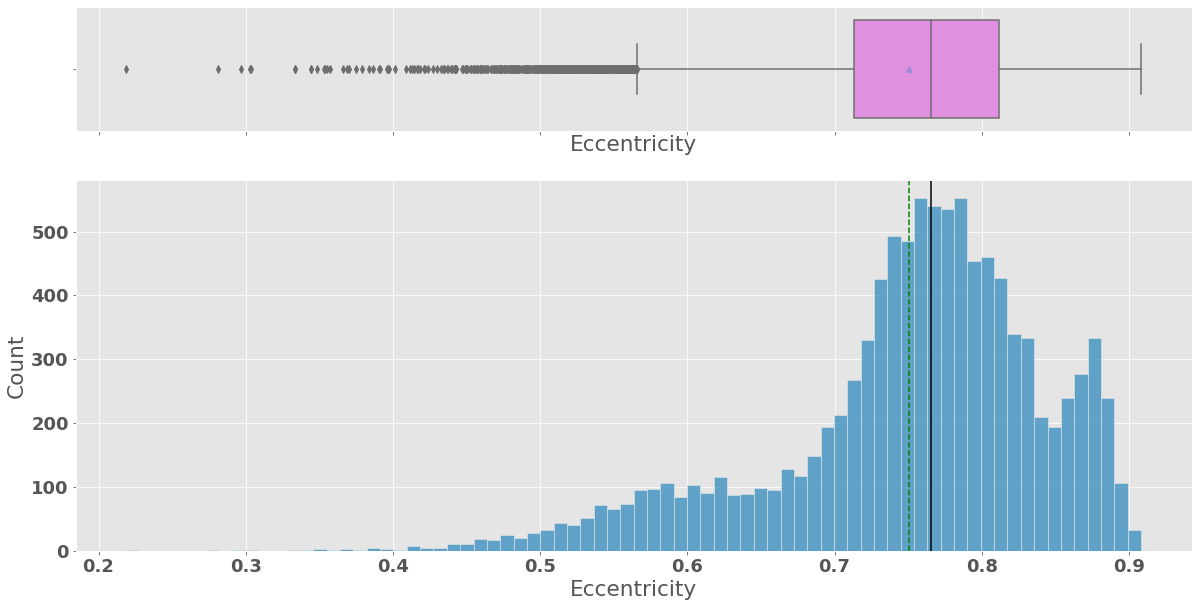

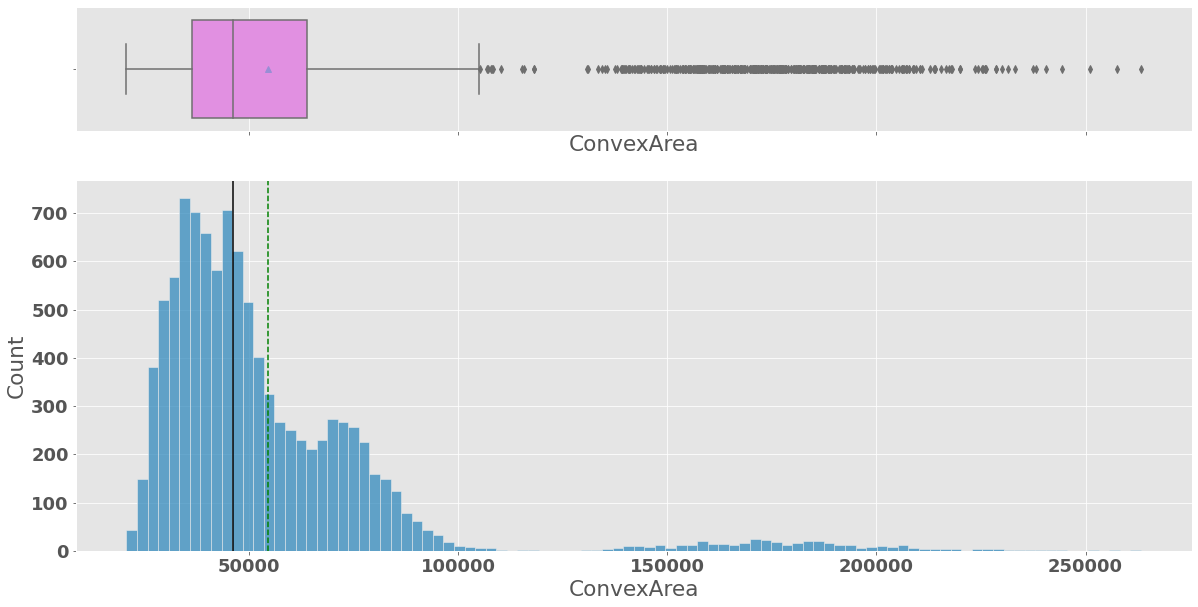

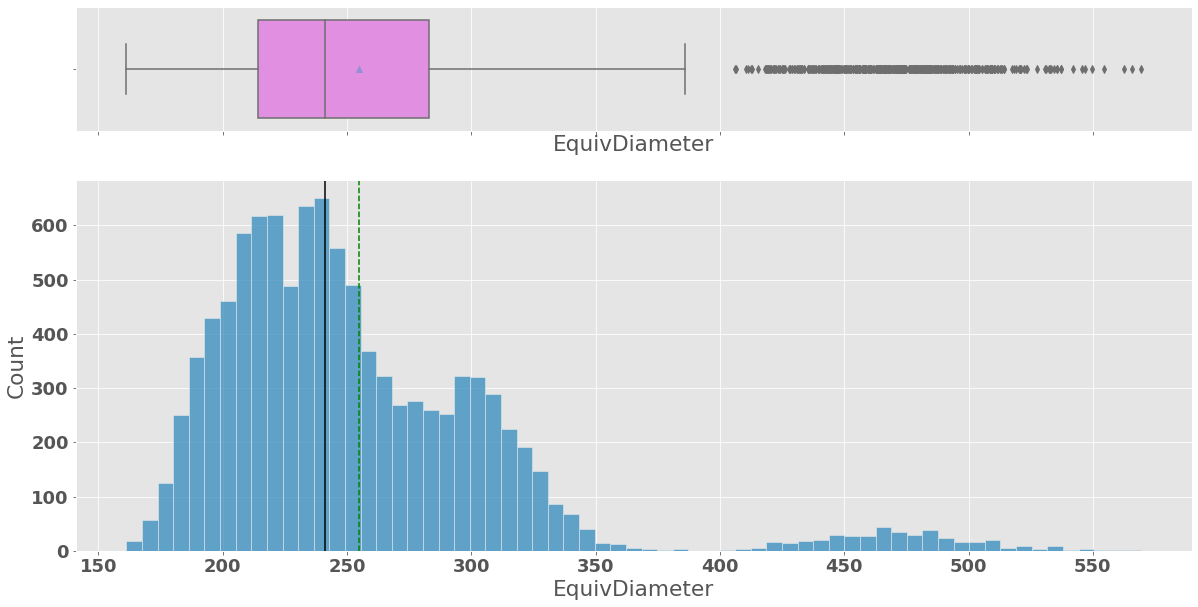

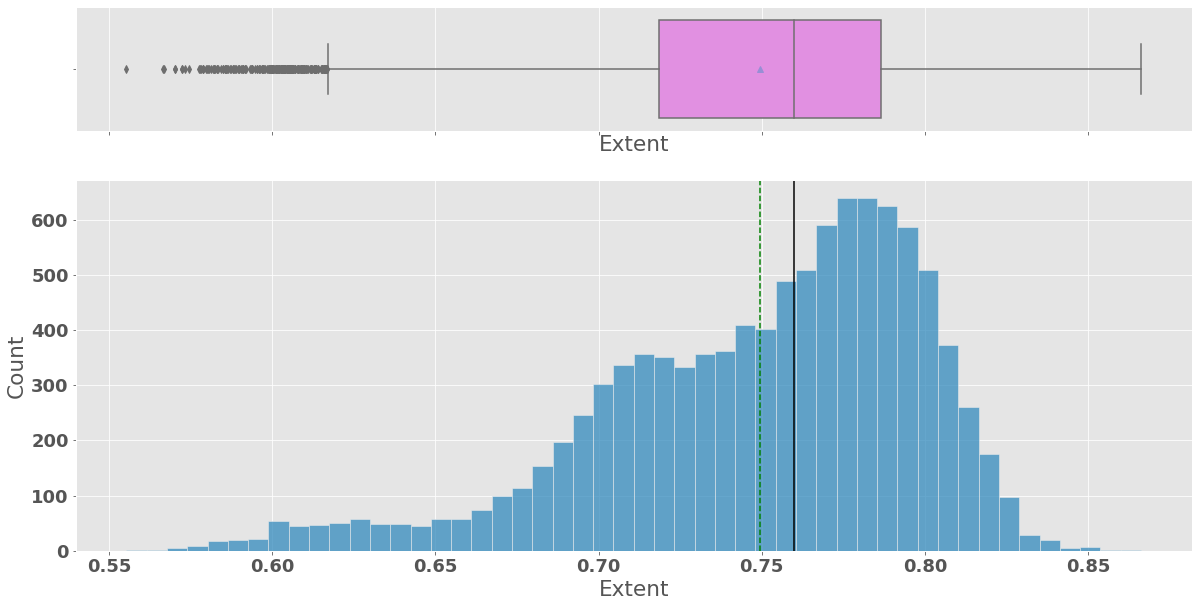

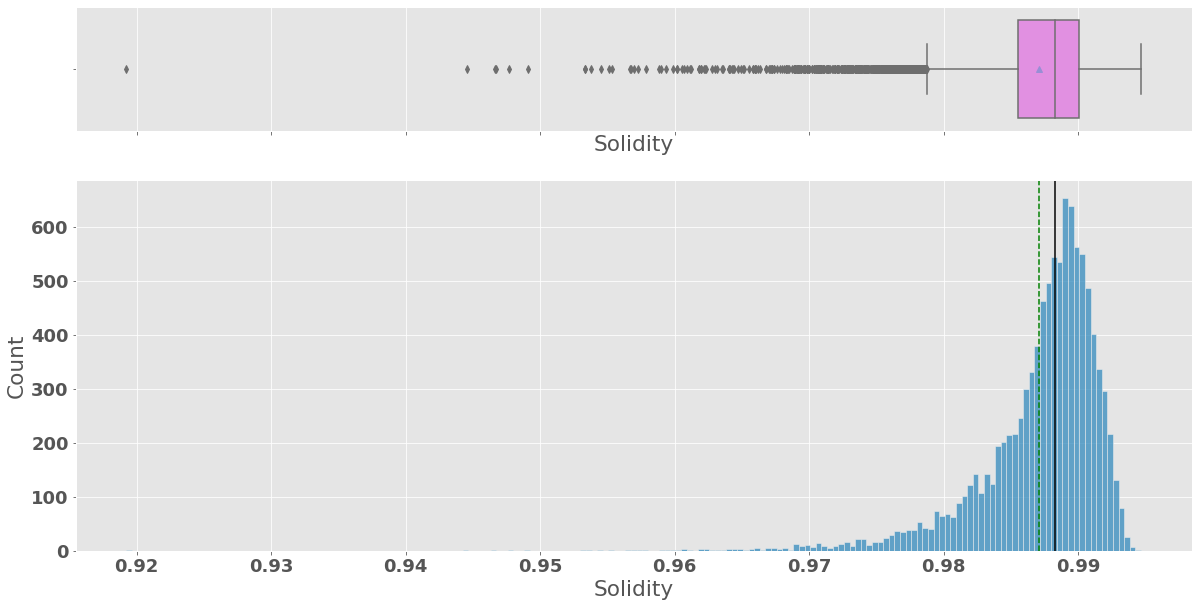

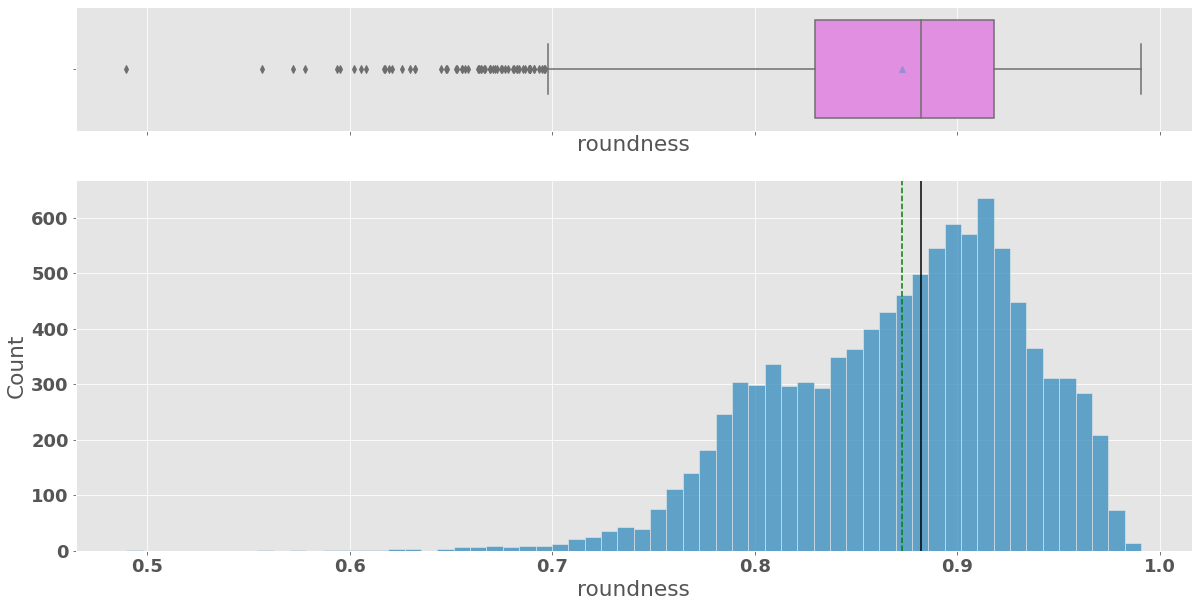

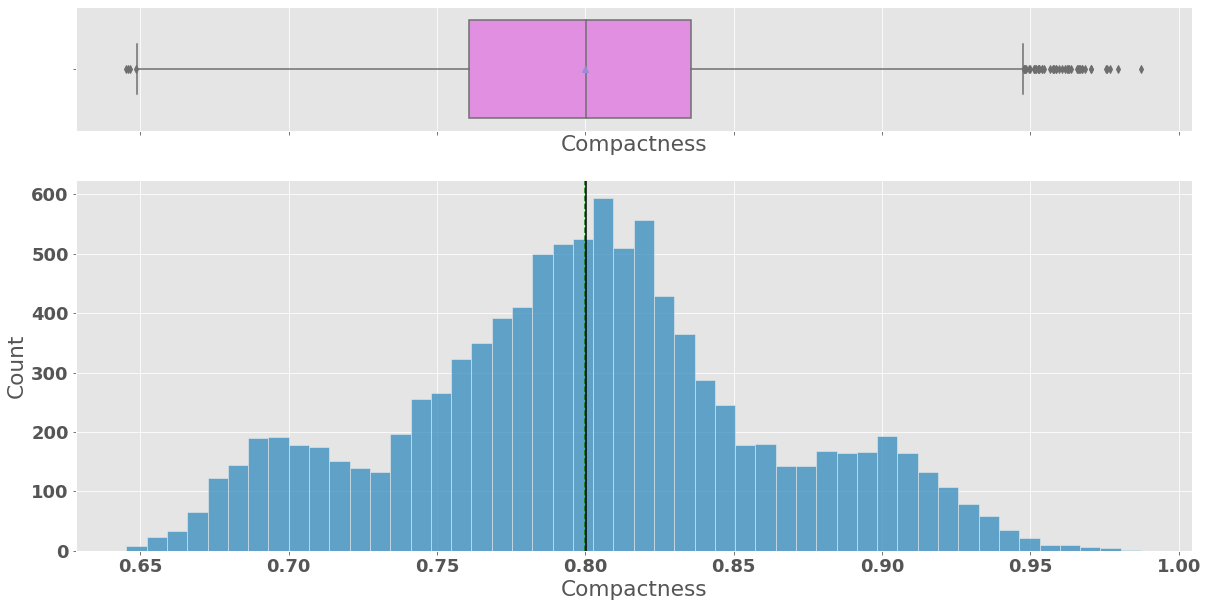

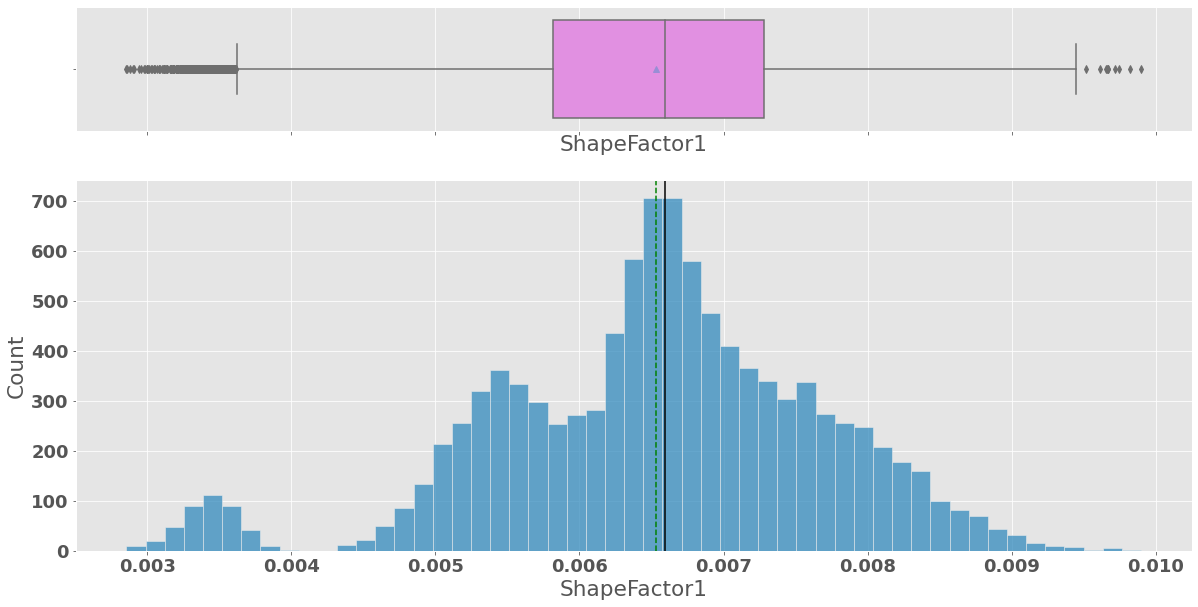

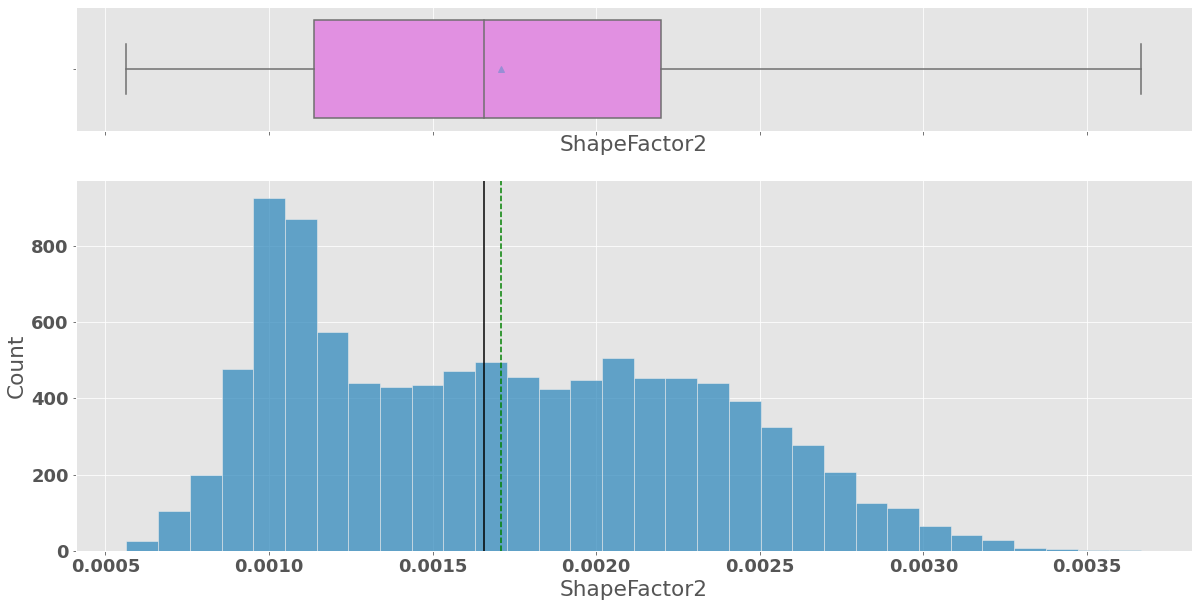

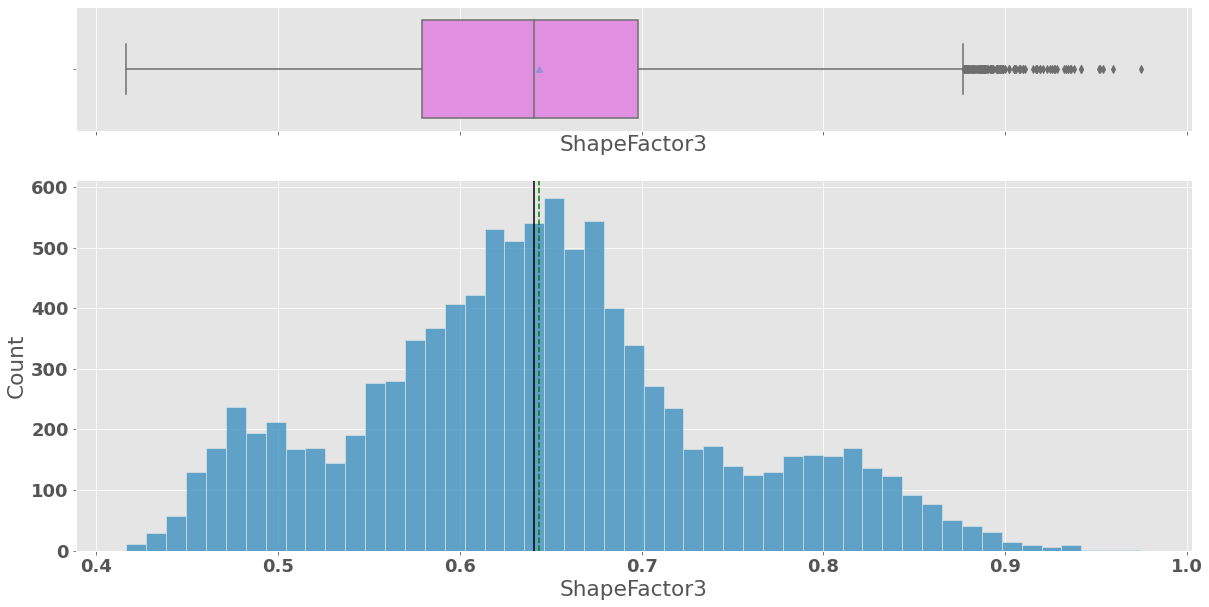

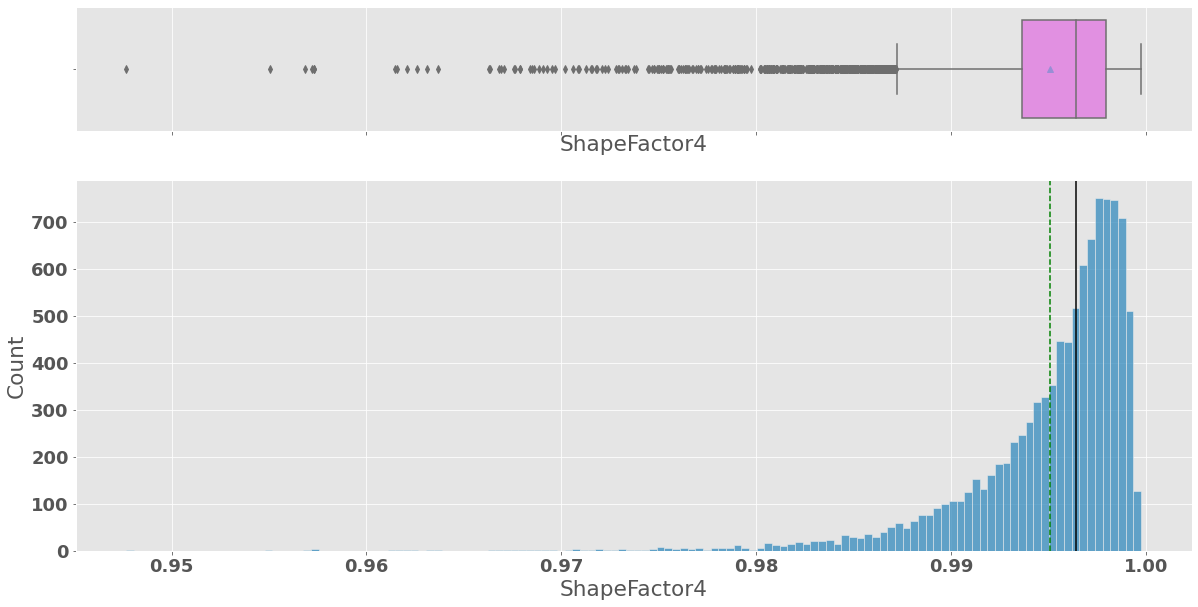

In [ ]:
for col in train_df.columns.tolist()[:-1]:
    histogram_boxplot(train_df[col],figsize=(20,10))

## **3.8.** Skewness ***Conclusion***
### **3.8.1.** Most of the feature need **transformation**

## **3.9.** Discover best **Model**

In [44]:
def lazy_pridict(X,Y,x_val,y_val,top_model_num=10):
    lazy_model = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
    # x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=42)
    _ ,test=lazy_model.fit(X,x_val,Y,y_val)
    display(test.head(top_model_num))

### **3.9.1** data without **preprocessing**

In [67]:
x_train,x_val,y_train,y_val = train_test_split(train_df.drop(columns=['y']),train_df['y'],test_size=0.2,random_state=42)
sira_t= x_train[y_train=='SIRA']
x_train.loc[x_train[y_train=='SIRA'].index,'Area'] = np.nan
y_train = y_train[y_train!='SIRA']
x_train.dropna(inplace=True)
x_train = pd.concat([sira_t[sira_t['Area']>41565],x_train],axis=0)
y_train = pd.concat([pd.Series(['SIRA']*sira_t[sira_t['Area']>41565].shape[0]),y_train],axis=0)
lazy_pridict(x_train,y_train,x_val,y_val)

100%|██████████| 29/29 [00:31<00:00,  1.08s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.93,0.94,None,0.93,0.54
XGBClassifier,0.92,0.93,None,0.92,3.85
LGBMClassifier,0.92,0.93,None,0.92,1.89
KNeighborsClassifier,0.92,0.93,None,0.92,0.25
BaggingClassifier,0.92,0.93,None,0.92,1.28
LogisticRegression,0.92,0.93,None,0.92,0.51
QuadraticDiscriminantAnalysis,0.92,0.93,None,0.92,0.07
CalibratedClassifierCV,0.92,0.93,None,0.92,3.30
LinearSVC,0.92,0.93,None,0.92,0.80


# Feature Selection EDA

In [ ]:
train_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [ ]:
train_df['AMD'] = (train_df['MajorAxisLength']+train_df['MinorAxisLength']+train_df['Compactness'])/3
train_df['GMD'] = np.power(train_df['MajorAxisLength']*train_df['MinorAxisLength']*train_df['Compactness'],1/3)
train_df['SMD'] = np.sqrt(train_df['MajorAxisLength']*train_df['MinorAxisLength']+train_df['MinorAxisLength']*train_df['Compactness']+train_df['MajorAxisLength']*train_df['Compactness'])
train_df['sphercity'] = train_df['GMD'] / train_df['MajorAxisLength']
train_df['volume'] = (np.pi*np.power(train_df['GMD'],2)*np.power(train_df['MajorAxisLength'],2))/(12*train_df['MajorAxisLength']-6*train_df['GMD'])
train_df['surface area'] = (np.pi*train_df['GMD']*np.power(train_df['MajorAxisLength'],2))/(train_df['MajorAxisLength']-train_df['GMD'])
train_df['a'] = train_df['volume']/np.power(train_df['MinorAxisLength'],3)
train_df['b'] = train_df['surface area']/np.power(train_df['MinorAxisLength'],2)
train_df['my_shape_factor'] = train_df['a'] /train_df['b']
train_df['mass'] = train_df['Solidity']*train_df['volume']
train_df['bulk denisty'] = train_df['mass']/train_df['volume']
train_df['weight'] = 9.81*train_df['mass']
train_df['average diameter'] =  np.power((6*train_df['weight']*1000)/(1000*np.pi*train_df['Solidity']),1/3)
train_df['porosity'] = (1-(train_df['bulk denisty']/train_df['Solidity']))*100

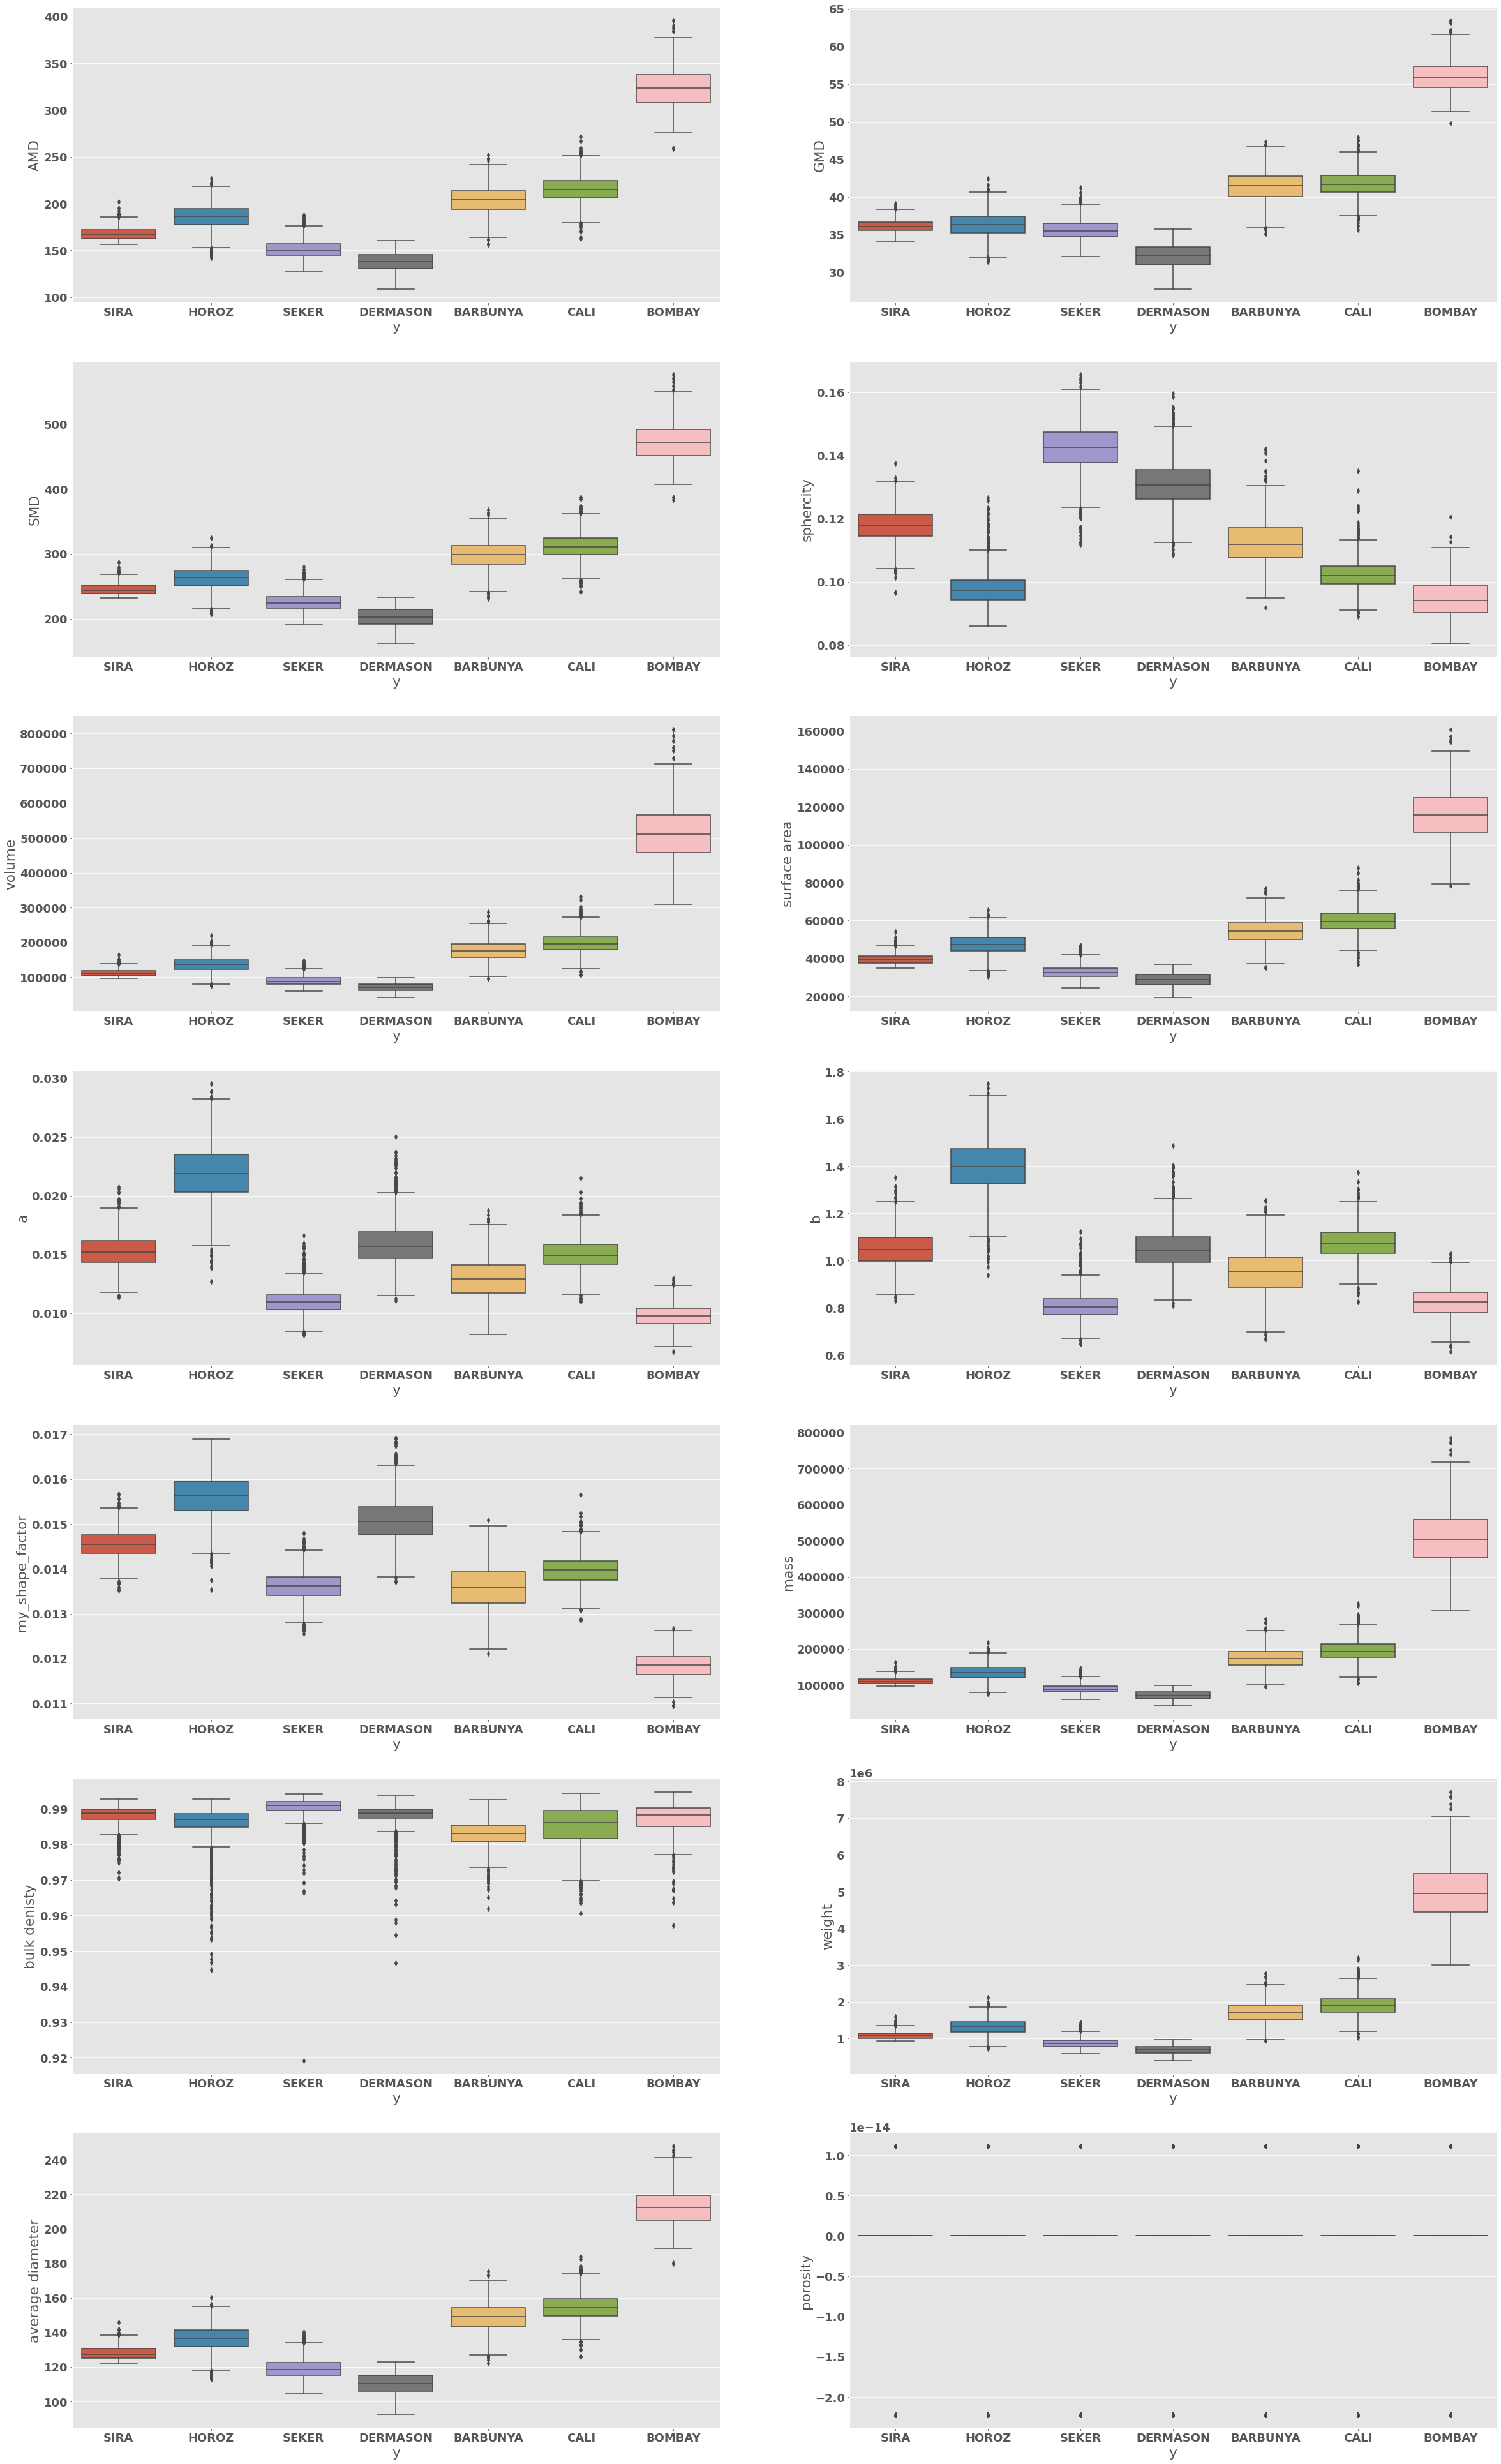

In [ ]:
fig = plt.figure(figsize=[40,80])
for index,feature in enumerate(['AMD','GMD','SMD','sphercity','volume','surface area','a','b','my_shape_factor','mass','bulk denisty','weight','average diameter','porosity']):
    ax = fig.add_subplot(8,2,index+1)
    sns.boxplot(data=train_df,x="y",y=feature,ax=ax)

In [69]:
import plotly.express as px

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [72]:
px.scatter_3d(train_df,x='Area',y='Extent',z='Eccentricity',color='y',height=1000)

In [ ]:
train_df[train_df['Area']<42000]['y'].value_counts()

DERMASON    2823
SEKER       1139
HOROZ         96
BARBUNYA       1
Name: y, dtype: int64